In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
import random
from scipy.stats import ks_2samp
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
def roundR(x, r):
    return [np.round(i,r) for i in np.array(x)]

In [3]:
def update_weights(model_weights):
  for i in range(len(model_weights)):
    for j in range(len(model_weights[i])):
      if isinstance(model_weights[i][j], np.ndarray):
        for k in range(len(model_weights[i][j])):
          #print("chalra h", i, j, k)
            if (np.round(model_weights[i][j][k],2)==0):
                model_weights[i][j][k]=float(f'{model_weights[i][j][k]:.1g}')
            else:
                model_weights[i][j][k]=np.round(model_weights[i][j][k],2)
      else:
        if (np.round(model_weights[i][j],2)==0):
          model_weights[i][j]=float(f'{model_weights[i][j]:.1g}')
        else:
          model_weights[i][j]=np.round(model_weights[i][j],2)
  return model_weights

In [4]:
def node_comparison1(node1, node2, epsilon=0.05):
  for x, y in zip(node1,node2):
    #print(x,y)
    if isinstance(x, list):
        if((np.linalg.norm(np.array(x)-np.array(y))/len(x))<=epsilon):
            continue
        else:
            return False
    else:
        if(abs(x-y)<=epsilon):
            continue
        else:
            return False
  return True

In [5]:
def layer_comparison(layer1, layer2):
  for node1 in layer1:
    present=False
    for node2 in layer2:
      if (node_comparison1(node1, node2)):
        present=True
    if present==False:
      return False
  return True

In [6]:
def check_models(Model_weights1, Model_weights2):
  for i in range(0,len(Model_weights1), 2):
    layer1=[]
    layer2=[]
    for j in range(len(Model_weights1[i+1].T)):
      Node1=[]
      Node2=[]
      Node1.append(list(Model_weights1[i].T[j]))
      Node1.append(Model_weights1[i+1][j])
      if (i+2<len(Model_weights1)):
        Node1.append(list(Model_weights1[i+2][j]))
      Node2.append(list(Model_weights2[i].T[j]))
      Node2.append(Model_weights2[i+1][j])
      if (i+2<len(Model_weights2)):
        Node2.append(list(Model_weights2[i+2][j]))
      layer1.append(Node1)
      layer2.append(Node2)
    if (layer_comparison(layer1, layer2)):
      continue
    else:
      return False
  return True

In [7]:
def get_initial_model(inp, out):
    model = tf.keras.Sequential([
        Dense(5, input_dim=inp, kernel_initializer='normal', activation='relu'),
        Dense(10, activation='relu'),
        Dense(5, activation='relu'),
        Dense(out, activation='softmax')
        ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [8]:
def get_initial_model_2(inp, out):
    model = tf.keras.Sequential([
        Dense(1024, input_dim=inp, kernel_initializer='normal', activation='relu'),
        Dense(out, activation='softmax')
        ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [9]:
def get_initial_model_3(inp, out):
    model = tf.keras.Sequential([
        Dense(10, input_dim=inp, kernel_initializer='normal', activation='relu'),
        Dense(20, activation='relu'),
        Dense(10, activation='relu'),
        Dense(out, activation='softmax')
        ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [10]:
def get_initial_model_4(inp, out):
    model = tf.keras.Sequential([
        Dense(5, input_dim=inp, kernel_initializer='normal', activation='relu'),
        Dense(10, activation='relu'),
        Dense(20, activation='relu'),
        Dense(10, activation='relu'),
        Dense(5, activation='relu'),
        Dense(out, activation='softmax')
        ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [11]:
def get_DP_initial_model(inp, out):
    model=tf.keras.Sequential([
        Dense(5, input_dim=inp, kernel_initializer='normal', activation='relu'),
        Dense(10, activation='relu'),
        Dense(5, activation='relu'),
        Dense(out, activation='softmax')
        ])
    return model

In [12]:
#this function is used to average out all the models in the epsilon range
#the problem is different here than compared with model comparison. Shape not important.
def get_avg_weights(models_weights, inp_shape, out_shape):
    avg_sum=get_initial_model(inp_shape, out_shape).get_weights()
    #print(avg_sum)
    for i in range(0,len(avg_sum),2):
        if (i+2<=len(avg_sum)):
            for j in range(len(avg_sum[i])):
                for k in range(len(avg_sum[i][j])):
                    avg_sum[i][j][k]=0
            for j in range(len(avg_sum[i+1])):
                avg_sum[i+1][j]=0
    #print(avg_sum)
    print(models_weights[0])
    for i in range(len(models_weights)):
        for j in range(0, len(avg_sum),2):
            #print(isinstance(avg_sum[j], np.ndarray))
            #if(isinstance(avg_sum[j][0], np.ndarray)):
            for k in range(len(avg_sum[j])):
                avg_sum[j][k]=[avg_sum[j][k][l]+models_weights[i][j][k][l] for l in range(len(avg_sum[j][k]))]
            #print(isinstance(avg_sum[j], np.ndarray))
            #else: gayab kr diya
            print('andr aara h')
            for k in range(len(avg_sum[j+1])):
                avg_sum[j+1][k]=avg_sum[j+1][k]+models_weights[i][j+1][k]
    print("yhn tk")
    mean_size=len(models_weights)
    print(mean_size)
    for i in range(0,len(avg_sum),2):
        if (i+2<=len(avg_sum)):
            for j in range(len(avg_sum[i])):
                #print("yhn tk")
                avg_sum[i][j]=[avg_sum[i][j][k]/mean_size for k in range(len(avg_sum[i][j]))]
            for j in range(len(avg_sum[i+1])):
                avg_sum[i+1][j]=avg_sum[i+1][j]/mean_size
    print("Done")
    return avg_sum

In [13]:
#this function is used to average out all the models in the epsilon range
#the problem is different here than compared with model comparison. Shape not important.
def get_avg_weights_2(models_weights, inp_shape, out_shape):
    avg_sum=get_initial_model_2(inp_shape, out_shape).get_weights()
    #print(avg_sum)
    for i in range(0,len(avg_sum),2):
        if (i+2<=len(avg_sum)):
            for j in range(len(avg_sum[i])):
                for k in range(len(avg_sum[i][j])):
                    avg_sum[i][j][k]=0
            for j in range(len(avg_sum[i+1])):
                avg_sum[i+1][j]=0
    #print(avg_sum)
    print(models_weights[0])
    for i in range(len(models_weights)):
        for j in range(0, len(avg_sum),2):
            #print(isinstance(avg_sum[j], np.ndarray))
            #if(isinstance(avg_sum[j][0], np.ndarray)):
            for k in range(len(avg_sum[j])):
                avg_sum[j][k]=[avg_sum[j][k][l]+models_weights[i][j][k][l] for l in range(len(avg_sum[j][k]))]
            #print(isinstance(avg_sum[j], np.ndarray))
            #else: gayab kr diya
            print('andr aara h')
            for k in range(len(avg_sum[j+1])):
                avg_sum[j+1][k]=avg_sum[j+1][k]+models_weights[i][j+1][k]
    print("yhn tk")
    mean_size=len(models_weights)
    print(mean_size)
    for i in range(0,len(avg_sum),2):
        if (i+2<=len(avg_sum)):
            for j in range(len(avg_sum[i])):
                #print("yhn tk")
                avg_sum[i][j]=[avg_sum[i][j][k]/mean_size for k in range(len(avg_sum[i][j]))]
            for j in range(len(avg_sum[i+1])):
                avg_sum[i+1][j]=avg_sum[i+1][j]/mean_size
    print("Done")
    return avg_sum

In [14]:
#this function is used to average out all the models in the epsilon range
#the problem is different here than compared with model comparison. Shape not important.
def get_avg_weights_3(models_weights, inp_shape, out_shape):
    avg_sum=get_initial_model_3(inp_shape, out_shape).get_weights()
    #print(avg_sum)
    for i in range(0,len(avg_sum),2):
        if (i+2<=len(avg_sum)):
            for j in range(len(avg_sum[i])):
                for k in range(len(avg_sum[i][j])):
                    avg_sum[i][j][k]=0
            for j in range(len(avg_sum[i+1])):
                avg_sum[i+1][j]=0
    #print(avg_sum)
    print(models_weights[0])
    for i in range(len(models_weights)):
        for j in range(0, len(avg_sum),2):
            #print(isinstance(avg_sum[j], np.ndarray))
            #if(isinstance(avg_sum[j][0], np.ndarray)):
            for k in range(len(avg_sum[j])):
                avg_sum[j][k]=[avg_sum[j][k][l]+models_weights[i][j][k][l] for l in range(len(avg_sum[j][k]))]
            #print(isinstance(avg_sum[j], np.ndarray))
            #else: gayab kr diya
            print('andr aara h')
            for k in range(len(avg_sum[j+1])):
                avg_sum[j+1][k]=avg_sum[j+1][k]+models_weights[i][j+1][k]
    print("yhn tk")
    mean_size=len(models_weights)
    print(mean_size)
    for i in range(0,len(avg_sum),2):
        if (i+2<=len(avg_sum)):
            for j in range(len(avg_sum[i])):
                #print("yhn tk")
                avg_sum[i][j]=[avg_sum[i][j][k]/mean_size for k in range(len(avg_sum[i][j]))]
            for j in range(len(avg_sum[i+1])):
                avg_sum[i+1][j]=avg_sum[i+1][j]/mean_size
    print("Done")
    return avg_sum

In [15]:
#this function is used to average out all the models in the epsilon range
#the problem is different here than compared with model comparison. Shape not important.
def get_avg_weights_4(models_weights, inp_shape, out_shape):
    avg_sum=get_initial_model_4(inp_shape, out_shape).get_weights()
    #print(avg_sum)
    for i in range(0,len(avg_sum),2):
        if (i+2<=len(avg_sum)):
            for j in range(len(avg_sum[i])):
                for k in range(len(avg_sum[i][j])):
                    avg_sum[i][j][k]=0
            for j in range(len(avg_sum[i+1])):
                avg_sum[i+1][j]=0
    #print(avg_sum)
    print(models_weights[0])
    for i in range(len(models_weights)):
        for j in range(0, len(avg_sum),2):
            #print(isinstance(avg_sum[j], np.ndarray))
            #if(isinstance(avg_sum[j][0], np.ndarray)):
            for k in range(len(avg_sum[j])):
                avg_sum[j][k]=[avg_sum[j][k][l]+models_weights[i][j][k][l] for l in range(len(avg_sum[j][k]))]
            #print(isinstance(avg_sum[j], np.ndarray))
            #else: gayab kr diya
            print('andr aara h')
            for k in range(len(avg_sum[j+1])):
                avg_sum[j+1][k]=avg_sum[j+1][k]+models_weights[i][j+1][k]
    print("yhn tk")
    mean_size=len(models_weights)
    print(mean_size)
    for i in range(0,len(avg_sum),2):
        if (i+2<=len(avg_sum)):
            for j in range(len(avg_sum[i])):
                #print("yhn tk")
                avg_sum[i][j]=[avg_sum[i][j][k]/mean_size for k in range(len(avg_sum[i][j]))]
            for j in range(len(avg_sum[i+1])):
                avg_sum[i+1][j]=avg_sum[i+1][j]/mean_size
    print("Done")
    return avg_sum

In [16]:
# custom functions for f1, precision and recall

from keras import backend as K
from tensorflow.keras.utils import to_categorical

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [25]:
#for SKIN_NonSkin dataset
df = pd.read_csv("Churn_Modelling.csv",sep=';')
#dataset.round(3)
#print(dataset['label'])
df_str = df.select_dtypes(include='object')
df_int = df.select_dtypes(exclude='object')

print(df.columns)

#handle categorical data
df_str = pd.get_dummies(df_str)

target_variable="Exited"
target = df_int[target_variable]
x = df_int.drop(columns=target_variable)
column_names = x.columns.values

scaler = preprocessing.StandardScaler()
x_stndrd = scaler.fit_transform(x)
type(x_stndrd)

x_stndrd = pd.DataFrame(x_stndrd)
x_stndrd.columns = column_names

dataset = pd.concat([x_stndrd,df_str, target],axis=1)
print(dataset.columns)

Positive=dataset[dataset[target_variable]==0]
Negative=dataset[dataset[target_variable]==1]
print(len(Positive))
print(len(Negative))

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')
Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male',
       'Exited'],
      dtype='object')
7963
2037


In [26]:
#the below code is for binary classification since MNSIT is a multi-class low-resolution image dataset. I am updating the code in the next cell.
N=500
#Positive=Pos
#Negative=Neg
positiveN=int((Positive.shape[0]/dataset.shape[0])*N)
negativeN=int(N-positiveN)
print(positiveN, negativeN)
#target variable
#target_variable="default.payment.next.month"
df1=Positive.sample(positiveN)
Positive.drop(df1.index, inplace=True)
df2=Negative.sample(negativeN)
Negative.drop(df2.index, inplace=True)
test_data=df1.append(df2, ignore_index=True)
test_data=test_data.sample(frac = 1) #This is to shuffel the training and testing data
test_data=test_data.sample(frac = 1)
test_data=test_data.sample(frac = 1)
X_test=test_data.drop(columns=[target_variable])
y_test=to_categorical(test_data[target_variable])

# adding dense layer
initial_model= get_initial_model(X_test.shape[1], 2)
initial_model.set_weights(update_weights(initial_model.get_weights()))
Models=[]
val_acc=[]
train_acc=[]
test_acc=[]
val_loss=[]
train_loss=[]
add_weights=[]
while Positive.empty==False and Negative.empty==False:
  print(positiveN, negativeN)
  df1=Positive.sample(min(positiveN, len(Positive)))
  Positive.drop(df1.index, inplace=True)
  df2=Negative.sample(min(negativeN, len(Negative)))
  Negative.drop(df2.index, inplace=True)
  train_data=df1.append(df2, ignore_index=True)
  train_data=train_data.sample(frac = 1) #shuffel train data 3 times
  train_data=train_data.sample(frac = 1) #shuffel train data 3 times
  train_data=train_data.sample(frac = 1) #shuffel train data 3 times
    
  #all models have different initialization
  # define the sequential model
  """initial_model = keras.Sequential()

    # adding dense layer
  initial_model.add(Dense(5, input_dim=X_test.shape[1], kernel_initializer='normal', activation='relu'))
  initial_model.add(Dense(10, activation='relu'))
  initial_model.add(Dense(5, activation='relu'))

    # adding dense layer with softmax activation/output layer
  initial_model.add(Dense(2, activation='softmax'))
  #initial_model.summary()"""
  ann_model=get_initial_model(X_test.shape[1], 2) #same intial weights
  ann_model.set_weights(initial_model.get_weights())
  X_train=train_data.drop(columns=[target_variable])
  #train_data[target_variable]=train_data[target_variable]-1 #only for skin_nonskin dataset
  y_train=to_categorical(train_data[target_variable])
  #print(y_train)
  ann_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[f1_m]) # metrics=['accuracy']
  history = ann_model.fit(X_train, y_train, epochs=20, validation_split=0.2, verbose=1)
  print(history.history['f1_m'][-1])
  ann_model.set_weights(update_weights(ann_model.get_weights()))
  pred_test=ann_model.predict(X_test)
  present=False
  for i in range(len(Models)):
    if (check_models(Models[i][0], ann_model.get_weights())):
      print("if any")
      Models[i][1]=Models[i][1]+1
      add_weights[i].append(ann_model.get_weights())
      val_acc[i].append(history.history['val_f1_m'])
      train_acc[i].append(history.history['f1_m'])
      test_acc[i].append(f1_m(y_test, pred_test).numpy())
      val_loss[i].append(history.history['val_loss'])
      train_loss[i].append(history.history['loss'])
      present=True
      break
  if present==False:
    add_weights.append([ann_model.get_weights()])
    Models.append([ann_model.get_weights(), 1])
    val_acc.append([history.history['val_f1_m']])
    train_acc.append([history.history['f1_m']])
    test_acc.append([f1_m(y_test, pred_test).numpy()])
    val_loss.append([history.history['val_loss']])
    train_loss.append([history.history['loss']])
for i in range(len(Models)):
  print(Models[i][1])
print("All Done")

398 102
398 102
Epoch 1/20


/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 9ms/step - loss: 0.6988 - f1_m: 0.4425 - val_loss: 0.6857 - val_f1_m: 0.7344
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6785 - f1_m: 0.7572 - val_loss: 0.6668 - val_f1_m: 0.7969
Epoch 3/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6637 - f1_m: 0.7812 - val_loss: 0.6510 - val_f1_m: 0.8125
Epoch 4/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6499 - f1_m: 0.7933 - val_loss: 0.6344 - val_f1_m: 0.8125
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6337 - f1_m: 0.7885 - val_loss: 0.6143 - val_f1_m: 0.8125
Epoch 6/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6133 - f1_m: 0.7885 - val_loss: 0.5922 - val_f1_m: 0.8125
Epoch 7/20
13/13 [==============================] - 0s 2ms/step - loss: 0.5912 - f1_m: 0.7933 - val_loss: 0.5657 - val_f1_m: 0.8125
Epoch 8/20
13/13 [==============================] - 0s 2ms/step - loss: 0.5665 - f1_m: 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 10ms/step - loss: 0.7001 - f1_m: 0.4327 - val_loss: 0.6828 - val_f1_m: 0.7344
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6767 - f1_m: 0.7981 - val_loss: 0.6729 - val_f1_m: 0.6875
Epoch 3/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6606 - f1_m: 0.8221 - val_loss: 0.6632 - val_f1_m: 0.6719
Epoch 4/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6440 - f1_m: 0.8125 - val_loss: 0.6519 - val_f1_m: 0.6719
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6246 - f1_m: 0.8125 - val_loss: 0.6391 - val_f1_m: 0.6719
Epoch 6/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6022 - f1_m: 0.8173 - val_loss: 0.6243 - val_f1_m: 0.6719
Epoch 7/20
13/13 [==============================] - 0s 2ms/step - loss: 0.5764 - f1_m: 0.8173 - val_loss: 0.6094 - val_f1_m: 0.6719
Epoch 8/20
13/13 [==============================] - 0s 2ms/step - loss: 0.5484 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 10ms/step - loss: 0.6980 - f1_m: 0.4544 - val_loss: 0.6866 - val_f1_m: 0.6172
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6772 - f1_m: 0.7764 - val_loss: 0.6698 - val_f1_m: 0.7812
Epoch 3/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6616 - f1_m: 0.8125 - val_loss: 0.6563 - val_f1_m: 0.7891
Epoch 4/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6457 - f1_m: 0.8005 - val_loss: 0.6406 - val_f1_m: 0.7812
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6271 - f1_m: 0.7981 - val_loss: 0.6216 - val_f1_m: 0.7812
Epoch 6/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6045 - f1_m: 0.7981 - val_loss: 0.5982 - val_f1_m: 0.7812
Epoch 7/20
13/13 [==============================] - 0s 2ms/step - loss: 0.5779 - f1_m: 0.8005 - val_loss: 0.5733 - val_f1_m: 0.7812
Epoch 8/20
13/13 [==============================] - 0s 2ms/step - loss: 0.5503 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 9ms/step - loss: 0.6993 - f1_m: 0.5010 - val_loss: 0.6848 - val_f1_m: 0.7109
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6777 - f1_m: 0.7740 - val_loss: 0.6698 - val_f1_m: 0.8516
Epoch 3/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6628 - f1_m: 0.7981 - val_loss: 0.6562 - val_f1_m: 0.7734
Epoch 4/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6470 - f1_m: 0.8053 - val_loss: 0.6413 - val_f1_m: 0.7734
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6286 - f1_m: 0.7957 - val_loss: 0.6242 - val_f1_m: 0.7734
Epoch 6/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6082 - f1_m: 0.7981 - val_loss: 0.6032 - val_f1_m: 0.7734
Epoch 7/20
13/13 [==============================] - 0s 2ms/step - loss: 0.5847 - f1_m: 0.7933 - val_loss: 0.5812 - val_f1_m: 0.7734
Epoch 8/20
13/13 [==============================] - 0s 2ms/step - loss: 0.5602 - f1_m: 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 10ms/step - loss: 0.6995 - f1_m: 0.4183 - val_loss: 0.6853 - val_f1_m: 0.6797
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6786 - f1_m: 0.7620 - val_loss: 0.6651 - val_f1_m: 0.8906
Epoch 3/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6639 - f1_m: 0.7933 - val_loss: 0.6484 - val_f1_m: 0.8828
Epoch 4/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6504 - f1_m: 0.7788 - val_loss: 0.6293 - val_f1_m: 0.8828
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6337 - f1_m: 0.7788 - val_loss: 0.6069 - val_f1_m: 0.8828
Epoch 6/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6138 - f1_m: 0.7812 - val_loss: 0.5797 - val_f1_m: 0.8828
Epoch 7/20
13/13 [==============================] - 0s 2ms/step - loss: 0.5906 - f1_m: 0.7885 - val_loss: 0.5484 - val_f1_m: 0.8828
Epoch 8/20
13/13 [==============================] - 0s 2ms/step - loss: 0.5662 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 9ms/step - loss: 0.6996 - f1_m: 0.4257 - val_loss: 0.6807 - val_f1_m: 0.7734
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6764 - f1_m: 0.7981 - val_loss: 0.6699 - val_f1_m: 0.7891
Epoch 3/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6614 - f1_m: 0.8125 - val_loss: 0.6595 - val_f1_m: 0.7031
Epoch 4/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6471 - f1_m: 0.8125 - val_loss: 0.6474 - val_f1_m: 0.6953
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6292 - f1_m: 0.8029 - val_loss: 0.6311 - val_f1_m: 0.6953
Epoch 6/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6074 - f1_m: 0.8125 - val_loss: 0.6118 - val_f1_m: 0.6953
Epoch 7/20
13/13 [==============================] - 0s 2ms/step - loss: 0.5831 - f1_m: 0.8029 - val_loss: 0.5920 - val_f1_m: 0.6953
Epoch 8/20
13/13 [==============================] - 0s 2ms/step - loss: 0.5557 - f1_m: 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 9ms/step - loss: 0.7002 - f1_m: 0.4399 - val_loss: 0.6859 - val_f1_m: 0.7734
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6786 - f1_m: 0.7620 - val_loss: 0.6671 - val_f1_m: 0.8125
Epoch 3/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6638 - f1_m: 0.7957 - val_loss: 0.6510 - val_f1_m: 0.8125
Epoch 4/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6493 - f1_m: 0.7861 - val_loss: 0.6321 - val_f1_m: 0.8125
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6321 - f1_m: 0.7909 - val_loss: 0.6090 - val_f1_m: 0.8125
Epoch 6/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6117 - f1_m: 0.7764 - val_loss: 0.5845 - val_f1_m: 0.8125
Epoch 7/20
13/13 [==============================] - 0s 2ms/step - loss: 0.5903 - f1_m: 0.7861 - val_loss: 0.5581 - val_f1_m: 0.8125
Epoch 8/20
13/13 [==============================] - 0s 2ms/step - loss: 0.5662 - f1_m: 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 9ms/step - loss: 0.7004 - f1_m: 0.4618 - val_loss: 0.6878 - val_f1_m: 0.7031
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6789 - f1_m: 0.7716 - val_loss: 0.6726 - val_f1_m: 0.7031
Epoch 3/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6638 - f1_m: 0.8005 - val_loss: 0.6613 - val_f1_m: 0.7109
Epoch 4/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6509 - f1_m: 0.8005 - val_loss: 0.6498 - val_f1_m: 0.7109
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6369 - f1_m: 0.8029 - val_loss: 0.6375 - val_f1_m: 0.7109
Epoch 6/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6219 - f1_m: 0.8029 - val_loss: 0.6231 - val_f1_m: 0.7109
Epoch 7/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6038 - f1_m: 0.7981 - val_loss: 0.6070 - val_f1_m: 0.7109
Epoch 8/20
13/13 [==============================] - 0s 2ms/step - loss: 0.5831 - f1_m: 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 9ms/step - loss: 0.6994 - f1_m: 0.4473 - val_loss: 0.6869 - val_f1_m: 0.7969
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6784 - f1_m: 0.7740 - val_loss: 0.6683 - val_f1_m: 0.8047
Epoch 3/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6640 - f1_m: 0.7861 - val_loss: 0.6516 - val_f1_m: 0.8125
Epoch 4/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6498 - f1_m: 0.7933 - val_loss: 0.6328 - val_f1_m: 0.8125
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6324 - f1_m: 0.7909 - val_loss: 0.6099 - val_f1_m: 0.8125
Epoch 6/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6125 - f1_m: 0.7909 - val_loss: 0.5843 - val_f1_m: 0.8125
Epoch 7/20
13/13 [==============================] - 0s 2ms/step - loss: 0.5899 - f1_m: 0.7933 - val_loss: 0.5577 - val_f1_m: 0.8125
Epoch 8/20
13/13 [==============================] - 0s 2ms/step - loss: 0.5679 - f1_m: 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 10ms/step - loss: 0.6993 - f1_m: 0.4282 - val_loss: 0.6865 - val_f1_m: 0.6328
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6777 - f1_m: 0.7596 - val_loss: 0.6680 - val_f1_m: 0.8125
Epoch 3/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6630 - f1_m: 0.8077 - val_loss: 0.6530 - val_f1_m: 0.8047
Epoch 4/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6486 - f1_m: 0.7933 - val_loss: 0.6364 - val_f1_m: 0.7969
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6324 - f1_m: 0.7909 - val_loss: 0.6166 - val_f1_m: 0.7969
Epoch 6/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6116 - f1_m: 0.7933 - val_loss: 0.5944 - val_f1_m: 0.7969
Epoch 7/20
13/13 [==============================] - 0s 2ms/step - loss: 0.5879 - f1_m: 0.7957 - val_loss: 0.5676 - val_f1_m: 0.7969
Epoch 8/20
13/13 [==============================] - 0s 2ms/step - loss: 0.5638 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 10ms/step - loss: 0.7010 - f1_m: 0.4399 - val_loss: 0.6861 - val_f1_m: 0.7500
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6783 - f1_m: 0.7764 - val_loss: 0.6696 - val_f1_m: 0.8203
Epoch 3/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6623 - f1_m: 0.8005 - val_loss: 0.6564 - val_f1_m: 0.8359
Epoch 4/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6485 - f1_m: 0.7981 - val_loss: 0.6404 - val_f1_m: 0.8359
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6316 - f1_m: 0.8005 - val_loss: 0.6230 - val_f1_m: 0.8359
Epoch 6/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6119 - f1_m: 0.8005 - val_loss: 0.6005 - val_f1_m: 0.8359
Epoch 7/20
13/13 [==============================] - 0s 2ms/step - loss: 0.5880 - f1_m: 0.7981 - val_loss: 0.5763 - val_f1_m: 0.8359
Epoch 8/20
13/13 [==============================] - 0s 2ms/step - loss: 0.5638 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 9ms/step - loss: 0.6980 - f1_m: 0.4713 - val_loss: 0.6851 - val_f1_m: 0.7109
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6770 - f1_m: 0.7933 - val_loss: 0.6715 - val_f1_m: 0.8281
Epoch 3/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6621 - f1_m: 0.8221 - val_loss: 0.6597 - val_f1_m: 0.8125
Epoch 4/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6468 - f1_m: 0.8053 - val_loss: 0.6465 - val_f1_m: 0.8125
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6293 - f1_m: 0.8005 - val_loss: 0.6303 - val_f1_m: 0.8125
Epoch 6/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6084 - f1_m: 0.8077 - val_loss: 0.6106 - val_f1_m: 0.8125
Epoch 7/20
13/13 [==============================] - 0s 2ms/step - loss: 0.5832 - f1_m: 0.8053 - val_loss: 0.5893 - val_f1_m: 0.8125
Epoch 8/20
13/13 [==============================] - 0s 2ms/step - loss: 0.5569 - f1_m: 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 10ms/step - loss: 0.7014 - f1_m: 0.4363 - val_loss: 0.6831 - val_f1_m: 0.7656
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6790 - f1_m: 0.7572 - val_loss: 0.6680 - val_f1_m: 0.7891
Epoch 3/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6637 - f1_m: 0.7957 - val_loss: 0.6544 - val_f1_m: 0.7812
Epoch 4/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6478 - f1_m: 0.7957 - val_loss: 0.6388 - val_f1_m: 0.7812
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6303 - f1_m: 0.7837 - val_loss: 0.6188 - val_f1_m: 0.7812
Epoch 6/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6092 - f1_m: 0.7957 - val_loss: 0.5989 - val_f1_m: 0.7812
Epoch 7/20
13/13 [==============================] - 0s 2ms/step - loss: 0.5863 - f1_m: 0.7909 - val_loss: 0.5787 - val_f1_m: 0.7812
Epoch 8/20
13/13 [==============================] - 0s 2ms/step - loss: 0.5631 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 9ms/step - loss: 0.6995 - f1_m: 0.4329 - val_loss: 0.6840 - val_f1_m: 0.7656
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6769 - f1_m: 0.7909 - val_loss: 0.6701 - val_f1_m: 0.7656
Epoch 3/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6614 - f1_m: 0.8005 - val_loss: 0.6578 - val_f1_m: 0.7656
Epoch 4/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6455 - f1_m: 0.8029 - val_loss: 0.6428 - val_f1_m: 0.7656
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6271 - f1_m: 0.8077 - val_loss: 0.6243 - val_f1_m: 0.7656
Epoch 6/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6058 - f1_m: 0.8053 - val_loss: 0.6021 - val_f1_m: 0.7656
Epoch 7/20
13/13 [==============================] - 0s 2ms/step - loss: 0.5793 - f1_m: 0.8101 - val_loss: 0.5788 - val_f1_m: 0.7656
Epoch 8/20
13/13 [==============================] - 0s 2ms/step - loss: 0.5535 - f1_m: 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 9ms/step - loss: 0.7003 - f1_m: 0.4135 - val_loss: 0.6891 - val_f1_m: 0.5937
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6790 - f1_m: 0.7596 - val_loss: 0.6702 - val_f1_m: 0.6875
Epoch 3/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6634 - f1_m: 0.8029 - val_loss: 0.6559 - val_f1_m: 0.6719
Epoch 4/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6487 - f1_m: 0.7909 - val_loss: 0.6401 - val_f1_m: 0.6797
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6307 - f1_m: 0.7909 - val_loss: 0.6223 - val_f1_m: 0.6797
Epoch 6/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6097 - f1_m: 0.7981 - val_loss: 0.6005 - val_f1_m: 0.6797
Epoch 7/20
13/13 [==============================] - 0s 2ms/step - loss: 0.5849 - f1_m: 0.7981 - val_loss: 0.5753 - val_f1_m: 0.6797
Epoch 8/20
13/13 [==============================] - 0s 2ms/step - loss: 0.5554 - f1_m: 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 10ms/step - loss: 0.6995 - f1_m: 0.4495 - val_loss: 0.6902 - val_f1_m: 0.5547
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6784 - f1_m: 0.7692 - val_loss: 0.6682 - val_f1_m: 0.6875
Epoch 3/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6643 - f1_m: 0.7740 - val_loss: 0.6502 - val_f1_m: 0.7656
Epoch 4/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6498 - f1_m: 0.7861 - val_loss: 0.6329 - val_f1_m: 0.7734
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6346 - f1_m: 0.7788 - val_loss: 0.6123 - val_f1_m: 0.7734
Epoch 6/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6162 - f1_m: 0.7788 - val_loss: 0.5887 - val_f1_m: 0.7734
Epoch 7/20
13/13 [==============================] - 0s 2ms/step - loss: 0.5945 - f1_m: 0.7812 - val_loss: 0.5605 - val_f1_m: 0.7734
Epoch 8/20
13/13 [==============================] - 0s 2ms/step - loss: 0.5706 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 10ms/step - loss: 0.7022 - f1_m: 0.4163 - val_loss: 0.6881 - val_f1_m: 0.6953
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6782 - f1_m: 0.7596 - val_loss: 0.6719 - val_f1_m: 0.7109
Epoch 3/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6625 - f1_m: 0.8029 - val_loss: 0.6592 - val_f1_m: 0.7031
Epoch 4/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6472 - f1_m: 0.8029 - val_loss: 0.6459 - val_f1_m: 0.7031
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6289 - f1_m: 0.8029 - val_loss: 0.6302 - val_f1_m: 0.7031
Epoch 6/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6078 - f1_m: 0.8125 - val_loss: 0.6110 - val_f1_m: 0.7031
Epoch 7/20
13/13 [==============================] - 0s 2ms/step - loss: 0.5825 - f1_m: 0.8077 - val_loss: 0.5905 - val_f1_m: 0.7031
Epoch 8/20
13/13 [==============================] - 0s 2ms/step - loss: 0.5564 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 9ms/step - loss: 0.7011 - f1_m: 0.4543 - val_loss: 0.6886 - val_f1_m: 0.6641
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6791 - f1_m: 0.7596 - val_loss: 0.6720 - val_f1_m: 0.8281
Epoch 3/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6631 - f1_m: 0.7981 - val_loss: 0.6581 - val_f1_m: 0.8281
Epoch 4/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6481 - f1_m: 0.7957 - val_loss: 0.6441 - val_f1_m: 0.8281
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6321 - f1_m: 0.7981 - val_loss: 0.6279 - val_f1_m: 0.8281
Epoch 6/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6112 - f1_m: 0.8029 - val_loss: 0.6089 - val_f1_m: 0.8281
Epoch 7/20
13/13 [==============================] - 0s 2ms/step - loss: 0.5866 - f1_m: 0.8029 - val_loss: 0.5885 - val_f1_m: 0.8281
Epoch 8/20
13/13 [==============================] - 0s 2ms/step - loss: 0.5597 - f1_m: 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 10ms/step - loss: 0.6983 - f1_m: 0.4465 - val_loss: 0.6876 - val_f1_m: 0.6094
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6771 - f1_m: 0.7922 - val_loss: 0.6712 - val_f1_m: 0.8203
Epoch 3/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6620 - f1_m: 0.8127 - val_loss: 0.6567 - val_f1_m: 0.8359
Epoch 4/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6458 - f1_m: 0.8055 - val_loss: 0.6402 - val_f1_m: 0.8359
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6279 - f1_m: 0.7949 - val_loss: 0.6214 - val_f1_m: 0.8359
Epoch 6/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6064 - f1_m: 0.8055 - val_loss: 0.6008 - val_f1_m: 0.8359
Epoch 7/20
13/13 [==============================] - 0s 2ms/step - loss: 0.5817 - f1_m: 0.8090 - val_loss: 0.5776 - val_f1_m: 0.8359
Epoch 8/20
13/13 [==============================] - 0s 2ms/step - loss: 0.5568 - f1_m:

In [28]:
for i in range(len(Models)):
  print(Models[i][1])
print(len(Models))
#test_Acc = [i[0].numpy() for i in test_acc]
print(test_acc)

5
9
1
2
1
1
6
[[0.80399996, 0.8139999, 0.82799995, 0.80399996, 0.81799996], [0.7979999, 0.81999993, 0.82199997, 0.816, 0.81999993, 0.8099999, 0.82799995, 0.81999993, 0.80599993], [0.7979999], [0.7979999, 0.82399994], [0.81799996], [0.84599996]]


In [29]:
#not needed in this case
#this works for getting sorted recurrent models by frequency no
A=np.argsort(np.array(Models).T[1])[::-1][:3]
print(np.array(Models).T[1])
print(A)
temp=list(np.array(Models)[A])
print(temp[2][1])

[5 9 1 2 1 1]
[1 0 3]
2


/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  after removing the cwd from sys.path.
/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

In [30]:
#not needed
#reducing the metrics lists to top 5 models only
val_acc=list(np.array(val_acc)[A])
test_acc=list(np.array(test_acc)[A])
train_acc=list(np.array(train_acc)[A])
val_loss=list(np.array(val_loss)[A])
train_loss=list(np.array(train_loss)[A])

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  after removing the cwd from sys.path.
/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

In [31]:
mean_model_weights=[]
for i in range(5):
    mean_model_weights.append(get_avg_weights(add_weights[i],X_test.shape[1], 2))

[array([[ 1.7e-01,  1.1e-01, -7.0e-02, -3.0e-02, -2.0e-03],
       [-2.4e-01,  1.0e-02,  8.0e-02,  1.1e-01, -4.0e-02],
       [ 2.0e-04,  2.0e-02, -1.0e-02,  3.0e-02,  2.0e-02],
       [-1.2e-01,  1.0e-02, -1.0e-02, -2.0e-03, -2.0e-03],
       [ 1.1e-01,  4.0e-02, -2.0e-02, -4.0e-02, -5.0e-02],
       [ 3.0e-02, -1.0e-01,  6.0e-02,  6.0e-02, -5.0e-02],
       [ 6.0e-02,  6.0e-02, -1.7e-01, -1.9e-01,  4.0e-02],
       [-6.0e-02, -6.0e-02, -1.0e-02,  6.0e-02,  7.0e-02],
       [ 2.1e-01, -1.3e-01, -5.0e-02, -1.3e-01,  2.0e-02],
       [-3.0e-02, -4.0e-02,  1.5e-01,  1.2e-01,  4.0e-02],
       [ 2.4e-01,  3.0e-02, -2.0e-03, -1.3e-01, -1.1e-01],
       [ 1.0e-01,  6.0e-02,  2.0e-02,  1.5e-01, -1.4e-01],
       [ 2.3e-01, -7.0e-02,  5.0e-02,  5.0e-02, -2.0e-03]], dtype=float32), array([ 0.23 ,  0.01 , -0.004, -0.01 , -0.05 ], dtype=float32), array([[-0.03,  0.12,  0.01, -0.37,  0.26,  0.63, -0.02,  0.26, -0.63,
         0.75],
       [-0.01,  0.64, -0.08, -0.49, -0.06,  0.15, -0.14,  0.22, 

In [32]:
#mean models
from sklearn.model_selection import train_test_split
mean_models=[]
mean_model_train_metrics=[]
mean_model_loss=[]
mean_model_acc=[]
mean_model_test_metrics=[]
mean_model_test_loss=[]
mean_model_test_acc=[]
y = to_categorical(dataset[target_variable])
X = dataset.drop(columns=target_variable)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
for i in range(4):
    init_model=get_initial_model(X_test.shape[1], 2)
    init_model.set_weights(mean_model_weights[i])
    mean_model_train_metrics.append(init_model.evaluate(X_train, y_train))
    mean_model_loss.append(mean_model_train_metrics[i][0])
    mean_model_acc.append(mean_model_train_metrics[i][1])
    mean_model_test_metrics.append(init_model.evaluate(X_test, y_test))
    mean_model_test_loss.append(mean_model_test_metrics[i][0])
    mean_model_test_acc.append(mean_model_test_metrics[i][1])
print("Done for model selection")

94/94 [==============================] - 0s 580us/step - loss: 0.4299 - accuracy: 0.8010
Done for model selection


In [33]:
print(mean_model_loss, mean_model_acc)
print(mean_model_test_loss, mean_model_test_acc)

[0.42096585035324097, 0.41974571347236633, 0.4270402491092682, 0.42723044753074646] [0.8212857246398926, 0.821142852306366, 0.802142858505249, 0.8081428408622742]
[0.4315422475337982, 0.42652106285095215, 0.4376574754714966, 0.4299166202545166] [0.812333345413208, 0.8130000233650208, 0.7879999876022339, 0.8009999990463257]


In [34]:
#benchmark model
from sklearn.model_selection import train_test_split
y = to_categorical(dataset[target_variable])
X = dataset.drop(columns=target_variable)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
benchmark_model=get_initial_model(X_test.shape[1], 2) #same intial weights
benchmark_model.set_weights(initial_model.get_weights())
history = benchmark_model.fit(X_train, y_train, epochs=20, validation_split=0.2, verbose=1)
benchmark_model.set_weights(update_weights(benchmark_model.get_weights()))

Epoch 1/20
175/175 [==============================] - 0s 1ms/step - loss: 0.5777 - accuracy: 0.7811 - val_loss: 0.4880 - val_accuracy: 0.7793
Epoch 2/20
175/175 [==============================] - 0s 843us/step - loss: 0.4197 - accuracy: 0.8161 - val_loss: 0.4422 - val_accuracy: 0.8064
Epoch 3/20
175/175 [==============================] - 0s 833us/step - loss: 0.3928 - accuracy: 0.8325 - val_loss: 0.4306 - val_accuracy: 0.8143
Epoch 4/20
175/175 [==============================] - 0s 871us/step - loss: 0.3830 - accuracy: 0.8355 - val_loss: 0.4219 - val_accuracy: 0.8150
Epoch 5/20
175/175 [==============================] - 0s 842us/step - loss: 0.3742 - accuracy: 0.8396 - val_loss: 0.4127 - val_accuracy: 0.8171
Epoch 6/20
175/175 [==============================] - 0s 832us/step - loss: 0.3667 - accuracy: 0.8400 - val_loss: 0.4061 - val_accuracy: 0.8100
Epoch 7/20
175/175 [==============================] - 0s 866us/step - loss: 0.3559 - accuracy: 0.8475 - val_loss: 0.3979 - val_accuracy: 0

In [35]:
#benchmark metrics
benchmark_loss=history.history['loss']
benchmark_val_loss=history.history['val_loss']
benchmark_acc=history.history['accuracy']
benchmark_val_acc=history.history['val_accuracy']
benchmark_test_metrics=benchmark_model.evaluate(X_test, y_test)
benchmark_test_loss=benchmark_test_metrics[0]
benchmark_test_accuracy=benchmark_test_metrics[1]

94/94 [==============================] - 0s 601us/step - loss: 0.3503 - accuracy: 0.8580


In [88]:
benchmark_model.summary()

Model: "sequential_94"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_376 (Dense)           (None, 5)                 70        
                                                                 
 dense_377 (Dense)           (None, 10)                60        
                                                                 
 dense_378 (Dense)           (None, 5)                 55        
                                                                 
 dense_379 (Dense)           (None, 2)                 12        
                                                                 
Total params: 197
Trainable params: 197
Non-trainable params: 0
_________________________________________________________________


In [78]:
#from here onwards the comparison and computation of DP:
import tensorflow as tf
import numpy as np
import tensorflow_privacy

from tensorflow_privacy.privacy.analysis import compute_dp_sgd_privacy
l2_norm_clip = 2.5
noise_multiplier = 2.72
num_microbatches = 1

In [79]:
from sklearn.model_selection import train_test_split
y = to_categorical(dataset[target_variable])
X = dataset.drop(columns=target_variable)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
DP_model=get_DP_initial_model(X_test.shape[1], 2) #same intial weights
optimizer = tensorflow_privacy.DPKerasAdamOptimizer(
    l2_norm_clip=l2_norm_clip,
    noise_multiplier=noise_multiplier,
    num_microbatches=num_microbatches)
loss = tf.keras.losses.CategoricalCrossentropy(
    from_logits=True, reduction=tf.losses.Reduction.NONE)
DP_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=[f1_m])
history = DP_model.fit(X_train, y_train, epochs=20, validation_split=0.2, verbose=1)
#benchmark_model.set_weights(update_weights(benchmark_model.get_weights()))

Epoch 1/20
175/175 [==============================] - 1s 2ms/step - loss: 0.7313 - f1_m: 0.4156 - val_loss: 0.7266 - val_f1_m: 0.4579
Epoch 2/20
175/175 [==============================] - 0s 971us/step - loss: 0.7153 - f1_m: 0.5036 - val_loss: 0.7087 - val_f1_m: 0.5455
Epoch 3/20
175/175 [==============================] - 0s 932us/step - loss: 0.7077 - f1_m: 0.5371 - val_loss: 0.7066 - val_f1_m: 0.5578
Epoch 4/20
175/175 [==============================] - 0s 897us/step - loss: 0.7002 - f1_m: 0.5721 - val_loss: 0.6969 - val_f1_m: 0.5812
Epoch 5/20
175/175 [==============================] - 0s 907us/step - loss: 0.6976 - f1_m: 0.5757 - val_loss: 0.6993 - val_f1_m: 0.5691
Epoch 6/20
175/175 [==============================] - 0s 914us/step - loss: 0.6906 - f1_m: 0.5979 - val_loss: 0.6847 - val_f1_m: 0.6129
Epoch 7/20
175/175 [==============================] - 0s 1ms/step - loss: 0.6841 - f1_m: 0.6102 - val_loss: 0.6745 - val_f1_m: 0.6494
Epoch 8/20
175/175 [==============================] 

In [65]:
compute_dp_sgd_privacy.compute_dp_sgd_privacy(n=X_train.shape[0]*0.8,
                                              batch_size=1,
                                              noise_multiplier=0.75,
                                              epochs=1,
                                              delta=1e-5)[0]

DP-SGD with sampling rate = 0.0179% and noise_multiplier = 0.75 iterated over 5600 steps satisfies differential privacy with eps = 1.05 and delta = 1e-05.
The optimal RDP order is 9.0.


1.0515351613448647

In [74]:
#for epsilon ≈ 1
DP_1_loss=history.history['loss']
DP_1_f1=history.history['f1_m']
DP_1_f1_train=DP_model.evaluate(X_train,y_train)
DP_1_f1_test=DP_model.evaluate(X_test,y_test)

94/94 [==============================] - 0s 591us/step - loss: 0.5432 - f1_m: 0.7948


In [77]:
#for epsilon ≈ 0.5
DP_0_5_loss=history.history['loss']
DP_0_5_f1=history.history['f1_m']
DP_0_5_f1_train=DP_model.evaluate(X_train,y_train)
DP_0_5_f1_test=DP_model.evaluate(X_test,y_test)

94/94 [==============================] - 0s 565us/step - loss: 0.5340 - f1_m: 0.7891


In [80]:
#for epsilon ≈ 0.1
DP_0_1_loss=history.history['loss']
DP_0_1_f1=history.history['f1_m']
DP_0_1_f1_train=DP_model.evaluate(X_train,y_train)
DP_0_1_f1_test=DP_model.evaluate(X_test,y_test)

94/94 [==============================] - 0s 570us/step - loss: 0.5840 - f1_m: 0.8010


3
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


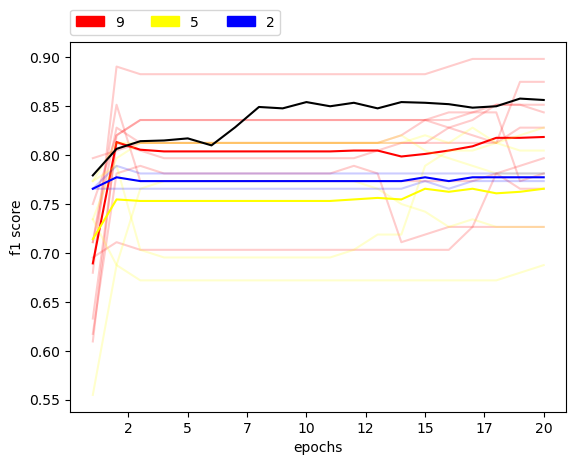

In [71]:
#plotting graphs for loss and accuracies for the top 5 recurrent models:
#plotting val_loss and loss for the models generated and the benchmark model.
from random import randint
import matplotlib.patches as mpatches
color = ['red', 'yellow','blue']
leg=[]
for i in range(len(color)):
    leg.append(mpatches.Patch(color=color[i], label=str(len(val_acc[i]))))
n = len(val_acc)
print(n)
x_axis=np.arange(1, 21, 1)
print(x_axis)
for i in range(n):
    for j in range(len(val_acc[i])):
        plt.plot(x_axis,val_acc[i][j], color=color[i], alpha=0.2)
    plt.plot(x_axis, np.mean(val_acc[i], axis=0), color=color[i])
#plt.xlim(-0.5,20.5)
plt.xticks([2.5,5.0,7.5,10.0,12.5,15.0,17.5,20.0],[2,5,7,10,12,15,17,20])
plt.xlabel("epochs")
plt.ylabel("f1 score")
plt.legend(handles=leg, bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=5)
plt.plot(x_axis, benchmark_val_acc, color='black')
plt.savefig("fig/ChurnModelling_F1_Val_20Epochs_10000.jpeg")

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
1 0
1 1
1 2
1 3
1 4
2 0
2 1


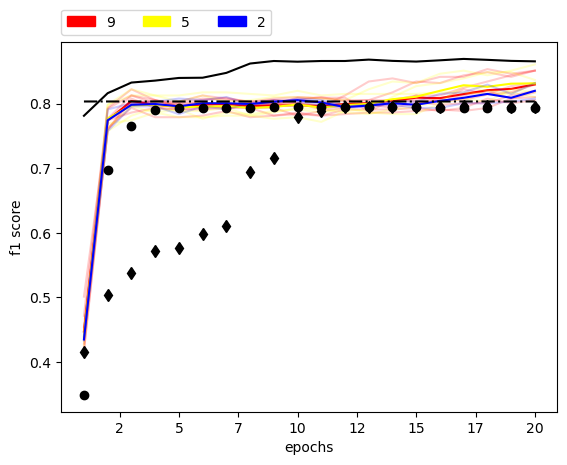

In [81]:
#train accuracy 
from random import randint
color = []
#print(train_acc[4][0])
color = ['red', 'yellow','blue', 'green']
x_axis=np.arange(1, 21, 1)
print(x_axis)
for i in range(n):
    for j in range(len(train_acc[i])):
        print(i,j)
        plt.plot(x_axis,train_acc[i][j], color=color[i], alpha=0.2)
    plt.plot(x_axis,np.mean(train_acc[i], axis=0), color=color[i])
plt.plot(x_axis,benchmark_acc, color='black')
plt.xticks([2.5,5.0,7.5,10.0,12.5,15.0,17.5,20.0],[2,5,7,10,12,15,17,20])
plt.xlabel("epochs")
plt.ylabel("f1 score")
plt.plot(x_axis, DP_1_f1, 'o', color='black')
plt.plot(x_axis, DP_0_5_f1, '-.', color='black')
plt.plot(x_axis, DP_0_1_f1, 'd', color='black')
plt.legend(handles=leg, bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=5)
plt.savefig("fig/ChurnModelling_F1_train_20Epochs_10000.jpeg")

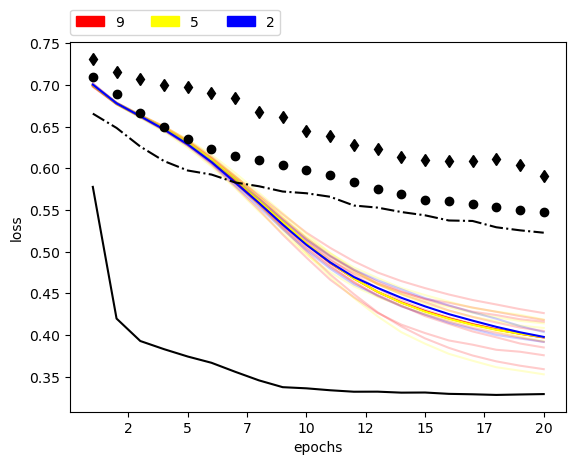

In [82]:
#training loss
from random import randint
color = []
n = len(train_loss)
color = ['red', 'yellow','blue', 'green']
for i in range(n):
    for j in range(len(train_loss[i])):
        plt.plot(x_axis,train_loss[i][j], color=color[i], alpha=0.2)
    plt.plot(x_axis,np.mean(train_loss[i], axis=0), color=color[i])
plt.plot(x_axis,benchmark_loss, color='black')
plt.xticks([2.5,5.0,7.5,10.0,12.5,15.0,17.5,20.0],[2,5,7,10,12,15,17,20])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(x_axis, DP_1_loss, 'o', color='black')
plt.plot(x_axis, DP_0_5_loss, '-.', color='black')
plt.plot(x_axis, DP_0_1_loss, 'd', color='black')
plt.legend(handles=leg, bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=5)
plt.savefig("fig/ChurnModelling_loss_train_20Epochs_10000.jpeg")

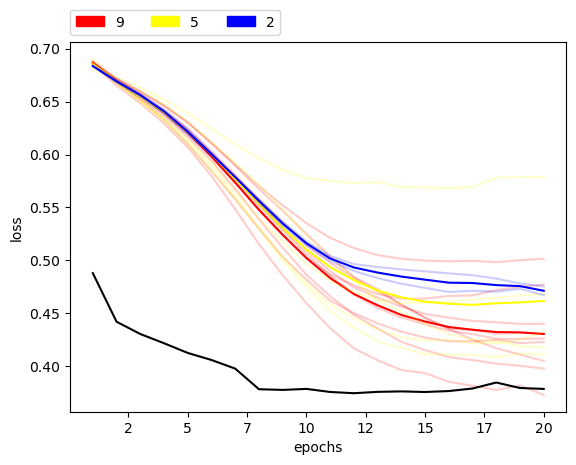

In [83]:
#validation loss loss
from random import randint
color = []
n = len(val_acc)
color = ['red', 'yellow','blue', 'green']
for i in range(n):
    for j in range(len(train_loss[i])):
        plt.plot(x_axis,val_loss[i][j], color=color[i], alpha=0.2)
    plt.plot(x_axis,np.mean(val_loss[i], axis=0), color=color[i])
plt.plot(x_axis,benchmark_val_loss, color='black')
plt.xticks([2.5,5.0,7.5,10.0,12.5,15.0,17.5,20.0],[2,5,7,10,12,15,17,20])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(handles=leg, bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=5)
plt.savefig("fig/ChurnModelling_loss_val_20Epochs_10000.jpeg")

In [84]:
#lets compute the accuracy for bigger test set 30% benchmark test data
high_test_loss=[]
high_test_f1=[]
for i in range(len(add_weights)):
    for j in range(len(add_weights[i])):
        high_test_model=get_initial_model(X_test.shape[1], 2) #same intial weights
        high_test_model.set_weights(Models[i][0])
        high_test_metrics=high_test_model.evaluate(X_test,y_test)
        if j == 0:
            high_test_loss.append([high_test_metrics[0]])
            high_test_f1.append([high_test_metrics[1]])
        else:
            high_test_loss[i].append(high_test_metrics[0])
            high_test_f1[i].append(high_test_metrics[1])
print(high_test_loss, high_test_f1)

94/94 [==============================] - 0s 585us/step - loss: 0.4311 - accuracy: 0.8120
[[0.4466472268104553, 0.4466472268104553, 0.4466472268104553, 0.4466472268104553, 0.4466472268104553], [0.4506192207336426, 0.4506192207336426, 0.4506192207336426, 0.4506192207336426, 0.4506192207336426, 0.4506192207336426, 0.4506192207336426, 0.4506192207336426, 0.4506192207336426], [0.4286843240261078], [0.4350427985191345, 0.4350427985191345], [0.43747904896736145], [0.43109750747680664]] [[0.8003333210945129, 0.8003333210945129, 0.8003333210945129, 0.8003333210945129, 0.8003333210945129], [0.7933333516120911, 0.7933333516120911, 0.7933333516120911, 0.7933333516120911, 0.7933333516120911, 0.7933333516120911, 0.7933333516120911, 0.7933333516120911, 0.7933333516120911], [0.8013333082199097], [0.8063333630561829, 0.8063333630561829], [0.8050000071525574], [0.8119999766349792]]


In [85]:
high_test_accs=list(np.array(high_test_f1)[A])
print(high_test_accs)

[[0.7933333516120911, 0.7933333516120911, 0.7933333516120911, 0.7933333516120911, 0.7933333516120911, 0.7933333516120911, 0.7933333516120911, 0.7933333516120911, 0.7933333516120911], [0.8003333210945129, 0.8003333210945129, 0.8003333210945129, 0.8003333210945129, 0.8003333210945129], [0.8063333630561829, 0.8063333630561829]]


/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


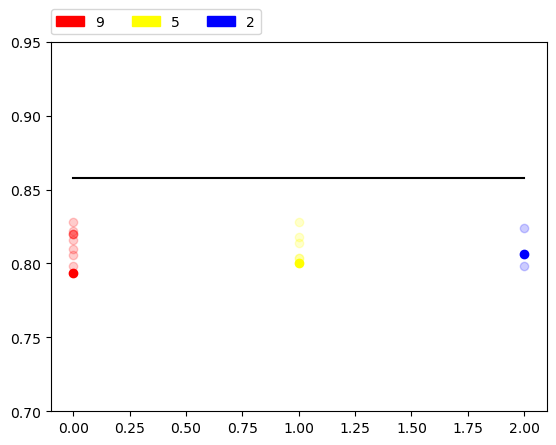

In [86]:
#for test accuracy plot
#plot test accuracy of smaller test set
benchmark_test_accs=[benchmark_test_accuracy]*n
ax = plt.gca()
ax.set_ylim([0.7, 0.95])
for i in range(n):
    plt.scatter([i]*len(test_acc[i]),test_acc[i], color=color[i], alpha=0.2)
    plt.scatter(i,high_test_accs[i][0], color=color[i])
plt.plot(benchmark_test_accs, color='black')
plt.legend(handles=leg, bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=5)
plt.savefig("fig/ChurnModelling_test_acc_20Epochs_1000.jpeg")
plt.show()

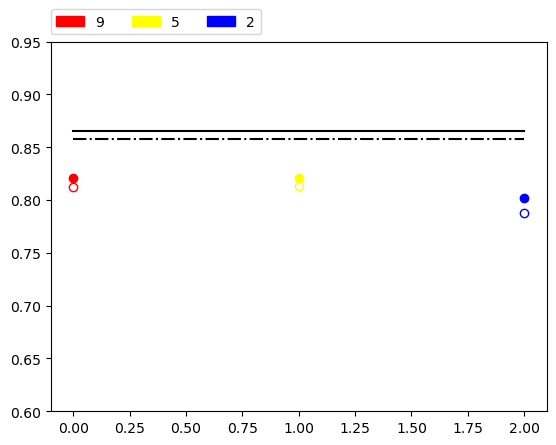

In [87]:
#plot for mean model accuracy and benchmark loss:
n=3
ax = plt.gca()
ax.set_ylim([0.6, 0.95])
for i in range(n):
    plt.plot(i, mean_model_acc[i],'o',color=color[i])
    plt.plot(i, mean_model_test_acc[i],'o', mfc='none',color=color[i])
plt.plot([benchmark_acc[-1]]*n,color='black')
plt.plot([benchmark_test_accuracy]*n,'-.',color='black')
plt.legend(handles=leg, bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=5)
plt.savefig("fig/Churn_modelling_mean_model_results.jpeg")
plt.show()

In [35]:
#from here on for ANN-2,3,4
#for SKIN_NonSkin dataset
df = pd.read_csv("Churn_Modelling.csv",sep=';')
#dataset.round(3)
#print(dataset['label'])
df_str = df.select_dtypes(include='object')
df_int = df.select_dtypes(exclude='object')

print(df.columns)

#handle categorical data
df_str = pd.get_dummies(df_str)

target_variable="Exited"
target = df_int[target_variable]
x = df_int.drop(columns=target_variable)
column_names = x.columns.values

scaler = preprocessing.StandardScaler()
x_stndrd = scaler.fit_transform(x)
type(x_stndrd)

x_stndrd = pd.DataFrame(x_stndrd)
x_stndrd.columns = column_names

dataset = pd.concat([x_stndrd,df_str, target],axis=1)
print(dataset.columns)

Positive=dataset[dataset[target_variable]==0]
Negative=dataset[dataset[target_variable]==1]
print(len(Positive))
print(len(Negative))

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')
Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male',
       'Exited'],
      dtype='object')
7963
2037


In [18]:
#the below code is for binary classification since MNSIT is a multi-class low-resolution image dataset. I am updating the code in the next cell.
N=500
#Positive=Pos
#Negative=Neg
positiveN=int((Positive.shape[0]/dataset.shape[0])*N)
negativeN=int(N-positiveN)
print(positiveN, negativeN)
#target variable
#target_variable="default.payment.next.month"
df1=Positive.sample(positiveN)
Positive.drop(df1.index, inplace=True)
df2=Negative.sample(negativeN)
Negative.drop(df2.index, inplace=True)
test_data=df1.append(df2, ignore_index=True)
test_data=test_data.sample(frac = 1) #This is to shuffel the training and testing data
test_data=test_data.sample(frac = 1)
test_data=test_data.sample(frac = 1)
X_test=test_data.drop(columns=[target_variable])
y_test=to_categorical(test_data[target_variable])

# adding dense layer
initial_model= get_initial_model_2(X_test.shape[1], 2)
initial_model.set_weights(update_weights(initial_model.get_weights()))
Models=[]
val_acc=[]
train_acc=[]
test_acc=[]
val_loss=[]
train_loss=[]
add_weights=[]
while Positive.empty==False and Negative.empty==False:
  print(positiveN, negativeN)
  df1=Positive.sample(min(positiveN, len(Positive)))
  Positive.drop(df1.index, inplace=True)
  df2=Negative.sample(min(negativeN, len(Negative)))
  Negative.drop(df2.index, inplace=True)
  train_data=df1.append(df2, ignore_index=True)
  train_data=train_data.sample(frac = 1) #shuffel train data 3 times
  train_data=train_data.sample(frac = 1) #shuffel train data 3 times
  train_data=train_data.sample(frac = 1) #shuffel train data 3 times
    
  #all models have different initialization
  # define the sequential model
  """initial_model = keras.Sequential()

    # adding dense layer
  initial_model.add(Dense(5, input_dim=X_test.shape[1], kernel_initializer='normal', activation='relu'))
  initial_model.add(Dense(10, activation='relu'))
  initial_model.add(Dense(5, activation='relu'))

    # adding dense layer with softmax activation/output layer
  initial_model.add(Dense(2, activation='softmax'))
  #initial_model.summary()"""
  ann_model=get_initial_model_2(X_test.shape[1], 2) #same intial weights
  ann_model.set_weights(initial_model.get_weights())
  X_train=train_data.drop(columns=[target_variable])
  #train_data[target_variable]=train_data[target_variable]-1 #only for skin_nonskin dataset
  y_train=to_categorical(train_data[target_variable])
  #print(y_train)
  ann_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[f1_m]) # metrics=['accuracy']
  history = ann_model.fit(X_train, y_train, epochs=20, validation_split=0.2, verbose=1)
  print(history.history['f1_m'][-1])
  ann_model.set_weights(update_weights(ann_model.get_weights()))
  pred_test=ann_model.predict(X_test)
  present=False
  for i in range(len(Models)):
    if (check_models(Models[i][0], ann_model.get_weights())):
      print("if any")
      Models[i][1]=Models[i][1]+1
      add_weights[i].append(ann_model.get_weights())
      val_acc[i].append(history.history['val_f1_m'])
      train_acc[i].append(history.history['f1_m'])
      test_acc[i].append(f1_m(y_test, pred_test).numpy())
      val_loss[i].append(history.history['val_loss'])
      train_loss[i].append(history.history['loss'])
      present=True
      break
  if present==False:
    add_weights.append([ann_model.get_weights()])
    Models.append([ann_model.get_weights(), 1])
    val_acc.append([history.history['val_f1_m']])
    train_acc.append([history.history['f1_m']])
    test_acc.append([f1_m(y_test, pred_test).numpy()])
    val_loss.append([history.history['val_loss']])
    train_loss.append([history.history['loss']])
for i in range(len(Models)):
  print(Models[i][1])
print("All Done")

398 102


/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
2022-11-28 14:51:12.799485: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


398 102
Epoch 1/20
13/13 [==============================] - 1s 11ms/step - loss: 0.5111 - f1_m: 0.7692 - val_loss: 0.4507 - val_f1_m: 0.8437
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 0.4236 - f1_m: 0.8077 - val_loss: 0.4039 - val_f1_m: 0.8750
Epoch 3/20
13/13 [==============================] - 0s 3ms/step - loss: 0.3801 - f1_m: 0.8462 - val_loss: 0.3925 - val_f1_m: 0.7969
Epoch 4/20
13/13 [==============================] - 0s 3ms/step - loss: 0.3612 - f1_m: 0.8702 - val_loss: 0.3824 - val_f1_m: 0.7969
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3463 - f1_m: 0.8582 - val_loss: 0.3858 - val_f1_m: 0.7969
Epoch 6/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3305 - f1_m: 0.8726 - val_loss: 0.3745 - val_f1_m: 0.8047
Epoch 7/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3157 - f1_m: 0.8774 - val_loss: 0.3574 - val_f1_m: 0.8281
Epoch 8/20
13/13 [==============================] - 0s 2ms/step - l

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 10ms/step - loss: 0.5432 - f1_m: 0.7596 - val_loss: 0.3863 - val_f1_m: 0.8750
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 0.4493 - f1_m: 0.7861 - val_loss: 0.3724 - val_f1_m: 0.8750
Epoch 3/20
13/13 [==============================] - 0s 3ms/step - loss: 0.4326 - f1_m: 0.8101 - val_loss: 0.3636 - val_f1_m: 0.8828
Epoch 4/20
13/13 [==============================] - 0s 3ms/step - loss: 0.3914 - f1_m: 0.8269 - val_loss: 0.3438 - val_f1_m: 0.8750
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3741 - f1_m: 0.8317 - val_loss: 0.3478 - val_f1_m: 0.8750
Epoch 6/20
13/13 [==============================] - 0s 3ms/step - loss: 0.3554 - f1_m: 0.8486 - val_loss: 0.3452 - val_f1_m: 0.8828
Epoch 7/20
13/13 [==============================] - 0s 3ms/step - loss: 0.3394 - f1_m: 0.8582 - val_loss: 0.3375 - val_f1_m: 0.8828
Epoch 8/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3260 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 9ms/step - loss: 0.5155 - f1_m: 0.7812 - val_loss: 0.5481 - val_f1_m: 0.8125
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 0.4045 - f1_m: 0.8029 - val_loss: 0.5068 - val_f1_m: 0.8516
Epoch 3/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3696 - f1_m: 0.8389 - val_loss: 0.4923 - val_f1_m: 0.8594
Epoch 4/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3418 - f1_m: 0.8606 - val_loss: 0.5008 - val_f1_m: 0.8594
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3270 - f1_m: 0.8606 - val_loss: 0.5105 - val_f1_m: 0.8594
Epoch 6/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3095 - f1_m: 0.8822 - val_loss: 0.4876 - val_f1_m: 0.8516
Epoch 7/20
13/13 [==============================] - 0s 2ms/step - loss: 0.2997 - f1_m: 0.8918 - val_loss: 0.4922 - val_f1_m: 0.8594
Epoch 8/20
13/13 [==============================] - 0s 2ms/step - loss: 0.2851 - f1_m: 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 9ms/step - loss: 0.4955 - f1_m: 0.7957 - val_loss: 0.4926 - val_f1_m: 0.7500
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3714 - f1_m: 0.8269 - val_loss: 0.4608 - val_f1_m: 0.7891
Epoch 3/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3235 - f1_m: 0.8678 - val_loss: 0.4598 - val_f1_m: 0.7344
Epoch 4/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3044 - f1_m: 0.8702 - val_loss: 0.4704 - val_f1_m: 0.7187
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 0.2856 - f1_m: 0.8726 - val_loss: 0.4752 - val_f1_m: 0.7187
Epoch 6/20
13/13 [==============================] - 0s 2ms/step - loss: 0.2729 - f1_m: 0.8846 - val_loss: 0.4716 - val_f1_m: 0.7266
Epoch 7/20
13/13 [==============================] - 0s 2ms/step - loss: 0.2568 - f1_m: 0.9038 - val_loss: 0.4818 - val_f1_m: 0.7266
Epoch 8/20
13/13 [==============================] - 0s 2ms/step - loss: 0.2469 - f1_m: 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 17ms/step - loss: 0.5267 - f1_m: 0.7524 - val_loss: 0.4652 - val_f1_m: 0.8359
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 0.4374 - f1_m: 0.8005 - val_loss: 0.4206 - val_f1_m: 0.7891
Epoch 3/20
13/13 [==============================] - 0s 2ms/step - loss: 0.4021 - f1_m: 0.8173 - val_loss: 0.4066 - val_f1_m: 0.8203
Epoch 4/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3853 - f1_m: 0.8245 - val_loss: 0.3951 - val_f1_m: 0.8281
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3700 - f1_m: 0.8317 - val_loss: 0.3862 - val_f1_m: 0.8359
Epoch 6/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3540 - f1_m: 0.8437 - val_loss: 0.3761 - val_f1_m: 0.8359
Epoch 7/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3419 - f1_m: 0.8558 - val_loss: 0.3682 - val_f1_m: 0.8437
Epoch 8/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3299 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 9ms/step - loss: 0.5298 - f1_m: 0.7788 - val_loss: 0.5054 - val_f1_m: 0.7734
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 0.4500 - f1_m: 0.8053 - val_loss: 0.4627 - val_f1_m: 0.7734
Epoch 3/20
13/13 [==============================] - 0s 2ms/step - loss: 0.4129 - f1_m: 0.8149 - val_loss: 0.4602 - val_f1_m: 0.7812
Epoch 4/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3993 - f1_m: 0.8005 - val_loss: 0.4564 - val_f1_m: 0.7891
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3848 - f1_m: 0.8317 - val_loss: 0.4353 - val_f1_m: 0.7734
Epoch 6/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3730 - f1_m: 0.8317 - val_loss: 0.4386 - val_f1_m: 0.7812
Epoch 7/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3593 - f1_m: 0.8462 - val_loss: 0.4303 - val_f1_m: 0.7812
Epoch 8/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3499 - f1_m: 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 10ms/step - loss: 0.5286 - f1_m: 0.7837 - val_loss: 0.4317 - val_f1_m: 0.7422
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 0.4269 - f1_m: 0.8077 - val_loss: 0.4078 - val_f1_m: 0.7656
Epoch 3/20
13/13 [==============================] - 0s 3ms/step - loss: 0.3892 - f1_m: 0.8413 - val_loss: 0.4199 - val_f1_m: 0.8203
Epoch 4/20
13/13 [==============================] - 0s 3ms/step - loss: 0.3766 - f1_m: 0.8438 - val_loss: 0.4179 - val_f1_m: 0.8281
Epoch 5/20
13/13 [==============================] - 0s 3ms/step - loss: 0.3591 - f1_m: 0.8437 - val_loss: 0.4258 - val_f1_m: 0.8203
Epoch 6/20
13/13 [==============================] - 0s 3ms/step - loss: 0.3458 - f1_m: 0.8462 - val_loss: 0.4181 - val_f1_m: 0.8203
Epoch 7/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3329 - f1_m: 0.8534 - val_loss: 0.4180 - val_f1_m: 0.8281
Epoch 8/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3261 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 9ms/step - loss: 0.5004 - f1_m: 0.7861 - val_loss: 0.5822 - val_f1_m: 0.7891
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 0.4243 - f1_m: 0.8173 - val_loss: 0.5124 - val_f1_m: 0.8281
Epoch 3/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3887 - f1_m: 0.8365 - val_loss: 0.4894 - val_f1_m: 0.8125
Epoch 4/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3737 - f1_m: 0.8365 - val_loss: 0.5166 - val_f1_m: 0.8125
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3502 - f1_m: 0.8582 - val_loss: 0.4819 - val_f1_m: 0.8047
Epoch 6/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3372 - f1_m: 0.8678 - val_loss: 0.4784 - val_f1_m: 0.8125
Epoch 7/20
13/13 [==============================] - 0s 3ms/step - loss: 0.3216 - f1_m: 0.8654 - val_loss: 0.4906 - val_f1_m: 0.8125
Epoch 8/20
13/13 [==============================] - 0s 3ms/step - loss: 0.3080 - f1_m: 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 9ms/step - loss: 0.5513 - f1_m: 0.7740 - val_loss: 0.4483 - val_f1_m: 0.6797
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 0.4464 - f1_m: 0.7957 - val_loss: 0.4084 - val_f1_m: 0.6953
Epoch 3/20
13/13 [==============================] - 0s 2ms/step - loss: 0.4011 - f1_m: 0.8413 - val_loss: 0.4051 - val_f1_m: 0.7500
Epoch 4/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3803 - f1_m: 0.8437 - val_loss: 0.4062 - val_f1_m: 0.6875
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3640 - f1_m: 0.8558 - val_loss: 0.3874 - val_f1_m: 0.6875
Epoch 6/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3508 - f1_m: 0.8606 - val_loss: 0.3878 - val_f1_m: 0.7578
Epoch 7/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3338 - f1_m: 0.8678 - val_loss: 0.3921 - val_f1_m: 0.6953
Epoch 8/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3198 - f1_m: 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 10ms/step - loss: 0.5419 - f1_m: 0.7740 - val_loss: 0.4510 - val_f1_m: 0.7891
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 0.4345 - f1_m: 0.8053 - val_loss: 0.4573 - val_f1_m: 0.7734
Epoch 3/20
13/13 [==============================] - 0s 2ms/step - loss: 0.4036 - f1_m: 0.8077 - val_loss: 0.4774 - val_f1_m: 0.7734
Epoch 4/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3833 - f1_m: 0.8341 - val_loss: 0.4750 - val_f1_m: 0.7734
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3666 - f1_m: 0.8389 - val_loss: 0.4710 - val_f1_m: 0.7812
Epoch 6/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3516 - f1_m: 0.8558 - val_loss: 0.4716 - val_f1_m: 0.7812
Epoch 7/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3394 - f1_m: 0.8702 - val_loss: 0.4788 - val_f1_m: 0.7812
Epoch 8/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3247 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 10ms/step - loss: 0.5640 - f1_m: 0.7572 - val_loss: 0.4218 - val_f1_m: 0.8047
Epoch 2/20
13/13 [==============================] - 0s 3ms/step - loss: 0.4699 - f1_m: 0.7933 - val_loss: 0.4207 - val_f1_m: 0.8047
Epoch 3/20
13/13 [==============================] - 0s 3ms/step - loss: 0.4373 - f1_m: 0.7981 - val_loss: 0.4239 - val_f1_m: 0.7891
Epoch 4/20
13/13 [==============================] - 0s 2ms/step - loss: 0.4192 - f1_m: 0.8029 - val_loss: 0.4166 - val_f1_m: 0.8203
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 0.4091 - f1_m: 0.8029 - val_loss: 0.4229 - val_f1_m: 0.7969
Epoch 6/20
13/13 [==============================] - 0s 3ms/step - loss: 0.3961 - f1_m: 0.8293 - val_loss: 0.4226 - val_f1_m: 0.8047
Epoch 7/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3807 - f1_m: 0.8437 - val_loss: 0.4157 - val_f1_m: 0.8125
Epoch 8/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3758 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 10ms/step - loss: 0.5314 - f1_m: 0.7716 - val_loss: 0.4906 - val_f1_m: 0.8437
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 0.4479 - f1_m: 0.7933 - val_loss: 0.4599 - val_f1_m: 0.8594
Epoch 3/20
13/13 [==============================] - 0s 2ms/step - loss: 0.4071 - f1_m: 0.8293 - val_loss: 0.4611 - val_f1_m: 0.7969
Epoch 4/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3881 - f1_m: 0.8437 - val_loss: 0.4480 - val_f1_m: 0.8750
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3681 - f1_m: 0.8486 - val_loss: 0.4456 - val_f1_m: 0.8672
Epoch 6/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3533 - f1_m: 0.8413 - val_loss: 0.4532 - val_f1_m: 0.8750
Epoch 7/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3393 - f1_m: 0.8558 - val_loss: 0.4562 - val_f1_m: 0.8672
Epoch 8/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3255 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 9ms/step - loss: 0.5267 - f1_m: 0.7812 - val_loss: 0.4689 - val_f1_m: 0.7812
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 0.4296 - f1_m: 0.8125 - val_loss: 0.4545 - val_f1_m: 0.8047
Epoch 3/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3967 - f1_m: 0.8365 - val_loss: 0.4433 - val_f1_m: 0.7812
Epoch 4/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3741 - f1_m: 0.8413 - val_loss: 0.4384 - val_f1_m: 0.7969
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3612 - f1_m: 0.8389 - val_loss: 0.4279 - val_f1_m: 0.7969
Epoch 6/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3443 - f1_m: 0.8606 - val_loss: 0.4226 - val_f1_m: 0.7969
Epoch 7/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3340 - f1_m: 0.8654 - val_loss: 0.4132 - val_f1_m: 0.7969
Epoch 8/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3220 - f1_m: 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 9ms/step - loss: 0.5204 - f1_m: 0.7596 - val_loss: 0.4637 - val_f1_m: 0.8516
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 0.4074 - f1_m: 0.8125 - val_loss: 0.4565 - val_f1_m: 0.8516
Epoch 3/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3693 - f1_m: 0.8413 - val_loss: 0.4544 - val_f1_m: 0.8281
Epoch 4/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3517 - f1_m: 0.8606 - val_loss: 0.4448 - val_f1_m: 0.8359
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3386 - f1_m: 0.8606 - val_loss: 0.4379 - val_f1_m: 0.8281
Epoch 6/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3299 - f1_m: 0.8654 - val_loss: 0.4269 - val_f1_m: 0.8359
Epoch 7/20
13/13 [==============================] - 0s 3ms/step - loss: 0.3244 - f1_m: 0.8678 - val_loss: 0.4219 - val_f1_m: 0.8437
Epoch 8/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3179 - f1_m: 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 10ms/step - loss: 0.5466 - f1_m: 0.7452 - val_loss: 0.3453 - val_f1_m: 0.8437
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 0.4454 - f1_m: 0.7837 - val_loss: 0.3464 - val_f1_m: 0.7891
Epoch 3/20
13/13 [==============================] - 0s 2ms/step - loss: 0.4122 - f1_m: 0.8149 - val_loss: 0.3472 - val_f1_m: 0.7891
Epoch 4/20
13/13 [==============================] - 0s 3ms/step - loss: 0.3995 - f1_m: 0.8197 - val_loss: 0.3424 - val_f1_m: 0.7656
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3863 - f1_m: 0.8197 - val_loss: 0.3221 - val_f1_m: 0.7891
Epoch 6/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3762 - f1_m: 0.8173 - val_loss: 0.3423 - val_f1_m: 0.7578
Epoch 7/20
13/13 [==============================] - 0s 3ms/step - loss: 0.3676 - f1_m: 0.8245 - val_loss: 0.3313 - val_f1_m: 0.7578
Epoch 8/20
13/13 [==============================] - 0s 3ms/step - loss: 0.3562 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 10ms/step - loss: 0.5219 - f1_m: 0.7644 - val_loss: 0.5114 - val_f1_m: 0.7656
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 0.4216 - f1_m: 0.8077 - val_loss: 0.4535 - val_f1_m: 0.7891
Epoch 3/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3920 - f1_m: 0.8413 - val_loss: 0.4273 - val_f1_m: 0.8047
Epoch 4/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3779 - f1_m: 0.8462 - val_loss: 0.4203 - val_f1_m: 0.8047
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3619 - f1_m: 0.8510 - val_loss: 0.4199 - val_f1_m: 0.8047
Epoch 6/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3525 - f1_m: 0.8510 - val_loss: 0.4160 - val_f1_m: 0.8047
Epoch 7/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3376 - f1_m: 0.8534 - val_loss: 0.4056 - val_f1_m: 0.8125
Epoch 8/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3257 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 9ms/step - loss: 0.5462 - f1_m: 0.7692 - val_loss: 0.4585 - val_f1_m: 0.8516
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 0.4731 - f1_m: 0.7957 - val_loss: 0.4333 - val_f1_m: 0.8672
Epoch 3/20
13/13 [==============================] - 0s 2ms/step - loss: 0.4415 - f1_m: 0.8077 - val_loss: 0.4244 - val_f1_m: 0.8672
Epoch 4/20
13/13 [==============================] - 0s 2ms/step - loss: 0.4262 - f1_m: 0.8101 - val_loss: 0.4218 - val_f1_m: 0.8672
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 0.4144 - f1_m: 0.8269 - val_loss: 0.4169 - val_f1_m: 0.8672
Epoch 6/20
13/13 [==============================] - 0s 2ms/step - loss: 0.4032 - f1_m: 0.8437 - val_loss: 0.4126 - val_f1_m: 0.8750
Epoch 7/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3948 - f1_m: 0.8437 - val_loss: 0.4126 - val_f1_m: 0.8828
Epoch 8/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3900 - f1_m: 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 9ms/step - loss: 0.5262 - f1_m: 0.7572 - val_loss: 0.4511 - val_f1_m: 0.7500
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 0.4405 - f1_m: 0.7885 - val_loss: 0.4077 - val_f1_m: 0.7734
Epoch 3/20
13/13 [==============================] - 0s 2ms/step - loss: 0.4051 - f1_m: 0.8341 - val_loss: 0.3955 - val_f1_m: 0.7578
Epoch 4/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3874 - f1_m: 0.8293 - val_loss: 0.3978 - val_f1_m: 0.7656
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3768 - f1_m: 0.8293 - val_loss: 0.3969 - val_f1_m: 0.7734
Epoch 6/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3592 - f1_m: 0.8437 - val_loss: 0.3832 - val_f1_m: 0.8281
Epoch 7/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3461 - f1_m: 0.8534 - val_loss: 0.3845 - val_f1_m: 0.8281
Epoch 8/20
13/13 [==============================] - 0s 3ms/step - loss: 0.3305 - f1_m: 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 9ms/step - loss: 0.5434 - f1_m: 0.7814 - val_loss: 0.4176 - val_f1_m: 0.8750
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 0.4476 - f1_m: 0.8007 - val_loss: 0.4068 - val_f1_m: 0.8750
Epoch 3/20
13/13 [==============================] - 0s 2ms/step - loss: 0.4164 - f1_m: 0.8186 - val_loss: 0.4266 - val_f1_m: 0.7266
Epoch 4/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3979 - f1_m: 0.8175 - val_loss: 0.3964 - val_f1_m: 0.8203
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3800 - f1_m: 0.8295 - val_loss: 0.3900 - val_f1_m: 0.8281
Epoch 6/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3657 - f1_m: 0.8367 - val_loss: 0.3908 - val_f1_m: 0.7656
Epoch 7/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3529 - f1_m: 0.8439 - val_loss: 0.3781 - val_f1_m: 0.8359
Epoch 8/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3387 - f1_m: 

In [19]:
len(add_weights[0])

19

In [20]:
mean_model_weights=get_avg_weights_2(add_weights[0],X_test.shape[1], 2)

[array([[-0.12  , -0.01  ,  0.03  , ..., -0.0004, -0.05  ,  0.02  ],
       [-0.04  , -0.03  , -0.02  , ..., -0.005 ,  0.02  ,  0.004 ],
       [-0.001 ,  0.03  , -0.05  , ..., -0.01  , -0.09  , -0.06  ],
       ...,
       [-0.01  ,  0.01  ,  0.02  , ...,  0.04  ,  0.1   , -0.03  ],
       [ 0.05  , -0.02  ,  0.04  , ...,  0.03  , -0.07  ,  0.06  ],
       [ 0.01  , -0.04  , -0.07  , ...,  0.0009,  0.04  ,  0.04  ]],
      dtype=float32), array([ 0.01,  0.03,  0.03, ..., -0.01, -0.01, -0.01], dtype=float32), array([[ 0.02, -0.04],
       [-0.05,  0.05],
       [-0.07,  0.07],
       ...,
       [-0.03, -0.03],
       [ 0.02,  0.07],
       [-0.03,  0.04]], dtype=float32), array([ 0.02, -0.02], dtype=float32)]
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr

In [22]:
#mean models
from sklearn.model_selection import train_test_split

y = to_categorical(dataset[target_variable], num_classes=2)
X = dataset.drop(columns=target_variable)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
init_model=get_initial_model_2(X_test.shape[1], 2)
init_model.set_weights(mean_model_weights)
init_model.evaluate(X_test, y_test)
print("Done for model selection")

94/94 [==============================] - 0s 679us/step - loss: 0.3622 - accuracy: 0.8520
Done for model selection


In [26]:
#ANN-3 
#the below code is for binary classification since MNSIT is a multi-class low-resolution image dataset. I am updating the code in the next cell.
N=500
#Positive=Pos
#Negative=Neg
positiveN=int((Positive.shape[0]/dataset.shape[0])*N)
negativeN=int(N-positiveN)
print(positiveN, negativeN)
#target variable
#target_variable="default.payment.next.month"
df1=Positive.sample(positiveN)
Positive.drop(df1.index, inplace=True)
df2=Negative.sample(negativeN)
Negative.drop(df2.index, inplace=True)
test_data=df1.append(df2, ignore_index=True)
test_data=test_data.sample(frac = 1) #This is to shuffel the training and testing data
test_data=test_data.sample(frac = 1)
test_data=test_data.sample(frac = 1)
X_test=test_data.drop(columns=[target_variable])
y_test=to_categorical(test_data[target_variable])

# adding dense layer
initial_model= get_initial_model_3(X_test.shape[1], 2)
initial_model.set_weights(update_weights(initial_model.get_weights()))
Models=[]
val_acc=[]
train_acc=[]
test_acc=[]
val_loss=[]
train_loss=[]
add_weights=[]
while Positive.empty==False and Negative.empty==False:
  print(positiveN, negativeN)
  df1=Positive.sample(min(positiveN, len(Positive)))
  Positive.drop(df1.index, inplace=True)
  df2=Negative.sample(min(negativeN, len(Negative)))
  Negative.drop(df2.index, inplace=True)
  train_data=df1.append(df2, ignore_index=True)
  train_data=train_data.sample(frac = 1) #shuffel train data 3 times
  train_data=train_data.sample(frac = 1) #shuffel train data 3 times
  train_data=train_data.sample(frac = 1) #shuffel train data 3 times
    
  #all models have different initialization
  # define the sequential model
  """initial_model = keras.Sequential()

    # adding dense layer
  initial_model.add(Dense(5, input_dim=X_test.shape[1], kernel_initializer='normal', activation='relu'))
  initial_model.add(Dense(10, activation='relu'))
  initial_model.add(Dense(5, activation='relu'))

    # adding dense layer with softmax activation/output layer
  initial_model.add(Dense(2, activation='softmax'))
  #initial_model.summary()"""
  ann_model=get_initial_model_3(X_test.shape[1], 2) #same intial weights
  ann_model.set_weights(initial_model.get_weights())
  X_train=train_data.drop(columns=[target_variable])
  #train_data[target_variable]=train_data[target_variable]-1 #only for skin_nonskin dataset
  y_train=to_categorical(train_data[target_variable])
  #print(y_train)
  ann_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[f1_m]) # metrics=['accuracy']
  history = ann_model.fit(X_train, y_train, epochs=10, validation_split=0.2, verbose=1)
  print(history.history['f1_m'][-1])
  ann_model.set_weights(update_weights(ann_model.get_weights()))
  pred_test=ann_model.predict(X_test)
  present=False
  for i in range(len(Models)):
    if (check_models(Models[i][0], ann_model.get_weights())):
      print("if any")
      Models[i][1]=Models[i][1]+1
      add_weights[i].append(ann_model.get_weights())
      val_acc[i].append(history.history['val_f1_m'])
      train_acc[i].append(history.history['f1_m'])
      test_acc[i].append(f1_m(y_test, pred_test).numpy())
      val_loss[i].append(history.history['val_loss'])
      train_loss[i].append(history.history['loss'])
      present=True
      break
  if present==False:
    add_weights.append([ann_model.get_weights()])
    Models.append([ann_model.get_weights(), 1])
    val_acc.append([history.history['val_f1_m']])
    train_acc.append([history.history['f1_m']])
    test_acc.append([f1_m(y_test, pred_test).numpy()])
    val_loss.append([history.history['val_loss']])
    train_loss.append([history.history['loss']])
for i in range(len(Models)):
  print(Models[i][1])
print("All Done")

398 102
398 102
Epoch 1/10


/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 10ms/step - loss: 0.6867 - f1_m: 0.6298 - val_loss: 0.6665 - val_f1_m: 0.7344
Epoch 2/10
13/13 [==============================] - 0s 2ms/step - loss: 0.6525 - f1_m: 0.7981 - val_loss: 0.6318 - val_f1_m: 0.7422
Epoch 3/10
13/13 [==============================] - 0s 2ms/step - loss: 0.6179 - f1_m: 0.7909 - val_loss: 0.5957 - val_f1_m: 0.7422
Epoch 4/10
13/13 [==============================] - 0s 3ms/step - loss: 0.5821 - f1_m: 0.7909 - val_loss: 0.5572 - val_f1_m: 0.7422
Epoch 5/10
13/13 [==============================] - 0s 3ms/step - loss: 0.5453 - f1_m: 0.7861 - val_loss: 0.5178 - val_f1_m: 0.7422
Epoch 6/10
13/13 [==============================] - 0s 3ms/step - loss: 0.5076 - f1_m: 0.7933 - val_loss: 0.4891 - val_f1_m: 0.7422
Epoch 7/10
13/13 [==============================] - 0s 3ms/step - loss: 0.4795 - f1_m: 0.7933 - val_loss: 0.4690 - val_f1_m: 0.7422
Epoch 8/10
13/13 [==============================] - 0s 3ms/step - loss: 0.4609 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 10ms/step - loss: 0.6861 - f1_m: 0.6178 - val_loss: 0.6622 - val_f1_m: 0.8437
Epoch 2/10
13/13 [==============================] - 0s 2ms/step - loss: 0.6555 - f1_m: 0.7812 - val_loss: 0.6188 - val_f1_m: 0.8437
Epoch 3/10
13/13 [==============================] - 0s 2ms/step - loss: 0.6254 - f1_m: 0.7692 - val_loss: 0.5739 - val_f1_m: 0.8437
Epoch 4/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5915 - f1_m: 0.7764 - val_loss: 0.5292 - val_f1_m: 0.8437
Epoch 5/10
13/13 [==============================] - 0s 3ms/step - loss: 0.5597 - f1_m: 0.7764 - val_loss: 0.4756 - val_f1_m: 0.8437
Epoch 6/10
13/13 [==============================] - 0s 3ms/step - loss: 0.5228 - f1_m: 0.7837 - val_loss: 0.4346 - val_f1_m: 0.8437
Epoch 7/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4996 - f1_m: 0.7812 - val_loss: 0.3967 - val_f1_m: 0.8437
Epoch 8/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4804 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 10ms/step - loss: 0.6880 - f1_m: 0.6058 - val_loss: 0.6711 - val_f1_m: 0.7422
Epoch 2/10
13/13 [==============================] - 0s 2ms/step - loss: 0.6540 - f1_m: 0.8053 - val_loss: 0.6441 - val_f1_m: 0.7578
Epoch 3/10
13/13 [==============================] - 0s 3ms/step - loss: 0.6181 - f1_m: 0.8053 - val_loss: 0.6143 - val_f1_m: 0.7578
Epoch 4/10
13/13 [==============================] - 0s 3ms/step - loss: 0.5787 - f1_m: 0.8053 - val_loss: 0.5816 - val_f1_m: 0.7578
Epoch 5/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5334 - f1_m: 0.8029 - val_loss: 0.5516 - val_f1_m: 0.7578
Epoch 6/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4921 - f1_m: 0.8077 - val_loss: 0.5295 - val_f1_m: 0.7578
Epoch 7/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4574 - f1_m: 0.8053 - val_loss: 0.5205 - val_f1_m: 0.7578
Epoch 8/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4329 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 11ms/step - loss: 0.6846 - f1_m: 0.6202 - val_loss: 0.6631 - val_f1_m: 0.8750
Epoch 2/10
13/13 [==============================] - 0s 2ms/step - loss: 0.6531 - f1_m: 0.7812 - val_loss: 0.6209 - val_f1_m: 0.8828
Epoch 3/10
13/13 [==============================] - 0s 2ms/step - loss: 0.6199 - f1_m: 0.7692 - val_loss: 0.5760 - val_f1_m: 0.8828
Epoch 4/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5848 - f1_m: 0.7861 - val_loss: 0.5314 - val_f1_m: 0.8828
Epoch 5/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5485 - f1_m: 0.7812 - val_loss: 0.4806 - val_f1_m: 0.8828
Epoch 6/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5154 - f1_m: 0.7764 - val_loss: 0.4377 - val_f1_m: 0.8828
Epoch 7/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4886 - f1_m: 0.7837 - val_loss: 0.4146 - val_f1_m: 0.8828
Epoch 8/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4713 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 10ms/step - loss: 0.6861 - f1_m: 0.6346 - val_loss: 0.6678 - val_f1_m: 0.8281
Epoch 2/10
13/13 [==============================] - 0s 2ms/step - loss: 0.6503 - f1_m: 0.7957 - val_loss: 0.6357 - val_f1_m: 0.8281
Epoch 3/10
13/13 [==============================] - 0s 2ms/step - loss: 0.6128 - f1_m: 0.8029 - val_loss: 0.6028 - val_f1_m: 0.8281
Epoch 4/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5755 - f1_m: 0.7981 - val_loss: 0.5649 - val_f1_m: 0.8281
Epoch 5/10
13/13 [==============================] - 0s 3ms/step - loss: 0.5326 - f1_m: 0.7933 - val_loss: 0.5312 - val_f1_m: 0.8281
Epoch 6/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4977 - f1_m: 0.8005 - val_loss: 0.5050 - val_f1_m: 0.8281
Epoch 7/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4703 - f1_m: 0.8005 - val_loss: 0.4880 - val_f1_m: 0.8281
Epoch 8/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4544 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 10ms/step - loss: 0.6863 - f1_m: 0.6298 - val_loss: 0.6695 - val_f1_m: 0.8437
Epoch 2/10
13/13 [==============================] - 0s 2ms/step - loss: 0.6540 - f1_m: 0.7957 - val_loss: 0.6351 - val_f1_m: 0.8281
Epoch 3/10
13/13 [==============================] - 0s 2ms/step - loss: 0.6170 - f1_m: 0.8005 - val_loss: 0.6006 - val_f1_m: 0.8281
Epoch 4/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5783 - f1_m: 0.8005 - val_loss: 0.5639 - val_f1_m: 0.8281
Epoch 5/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5339 - f1_m: 0.7981 - val_loss: 0.5329 - val_f1_m: 0.8281
Epoch 6/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4944 - f1_m: 0.8029 - val_loss: 0.5120 - val_f1_m: 0.8281
Epoch 7/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4705 - f1_m: 0.7981 - val_loss: 0.5034 - val_f1_m: 0.8281
Epoch 8/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4492 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 10ms/step - loss: 0.6844 - f1_m: 0.6490 - val_loss: 0.6705 - val_f1_m: 0.7578
Epoch 2/10
13/13 [==============================] - 0s 2ms/step - loss: 0.6497 - f1_m: 0.8029 - val_loss: 0.6370 - val_f1_m: 0.7734
Epoch 3/10
13/13 [==============================] - 0s 2ms/step - loss: 0.6130 - f1_m: 0.7957 - val_loss: 0.6023 - val_f1_m: 0.7734
Epoch 4/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5717 - f1_m: 0.8053 - val_loss: 0.5680 - val_f1_m: 0.7734
Epoch 5/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5281 - f1_m: 0.8005 - val_loss: 0.5359 - val_f1_m: 0.7734
Epoch 6/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4851 - f1_m: 0.7981 - val_loss: 0.5163 - val_f1_m: 0.7734
Epoch 7/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4521 - f1_m: 0.8029 - val_loss: 0.5077 - val_f1_m: 0.7734
Epoch 8/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4313 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 9ms/step - loss: 0.6860 - f1_m: 0.6226 - val_loss: 0.6708 - val_f1_m: 0.7266
Epoch 2/10
13/13 [==============================] - 0s 2ms/step - loss: 0.6541 - f1_m: 0.7933 - val_loss: 0.6390 - val_f1_m: 0.7266
Epoch 3/10
13/13 [==============================] - 0s 2ms/step - loss: 0.6197 - f1_m: 0.7909 - val_loss: 0.6065 - val_f1_m: 0.7266
Epoch 4/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5837 - f1_m: 0.8005 - val_loss: 0.5694 - val_f1_m: 0.7266
Epoch 5/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5446 - f1_m: 0.8029 - val_loss: 0.5300 - val_f1_m: 0.7266
Epoch 6/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5025 - f1_m: 0.7957 - val_loss: 0.5017 - val_f1_m: 0.7266
Epoch 7/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4721 - f1_m: 0.8005 - val_loss: 0.4864 - val_f1_m: 0.7266
Epoch 8/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4485 - f1_m: 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 10ms/step - loss: 0.6867 - f1_m: 0.6514 - val_loss: 0.6748 - val_f1_m: 0.7812
Epoch 2/10
13/13 [==============================] - 0s 2ms/step - loss: 0.6527 - f1_m: 0.8125 - val_loss: 0.6488 - val_f1_m: 0.7969
Epoch 3/10
13/13 [==============================] - 0s 2ms/step - loss: 0.6141 - f1_m: 0.8125 - val_loss: 0.6253 - val_f1_m: 0.7969
Epoch 4/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5730 - f1_m: 0.8077 - val_loss: 0.6035 - val_f1_m: 0.7969
Epoch 5/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5286 - f1_m: 0.8125 - val_loss: 0.5873 - val_f1_m: 0.7969
Epoch 6/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4860 - f1_m: 0.8077 - val_loss: 0.5847 - val_f1_m: 0.7969
Epoch 7/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4550 - f1_m: 0.8053 - val_loss: 0.5946 - val_f1_m: 0.7969
Epoch 8/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4325 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 10ms/step - loss: 0.6838 - f1_m: 0.6659 - val_loss: 0.6663 - val_f1_m: 0.8047
Epoch 2/10
13/13 [==============================] - 0s 2ms/step - loss: 0.6517 - f1_m: 0.7933 - val_loss: 0.6273 - val_f1_m: 0.7969
Epoch 3/10
13/13 [==============================] - 0s 2ms/step - loss: 0.6181 - f1_m: 0.7885 - val_loss: 0.5880 - val_f1_m: 0.7969
Epoch 4/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5791 - f1_m: 0.7909 - val_loss: 0.5476 - val_f1_m: 0.7969
Epoch 5/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5421 - f1_m: 0.7909 - val_loss: 0.5024 - val_f1_m: 0.7969
Epoch 6/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5040 - f1_m: 0.7957 - val_loss: 0.4657 - val_f1_m: 0.7969
Epoch 7/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4771 - f1_m: 0.7933 - val_loss: 0.4383 - val_f1_m: 0.7969
Epoch 8/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4563 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 9ms/step - loss: 0.6871 - f1_m: 0.6034 - val_loss: 0.6674 - val_f1_m: 0.8672
Epoch 2/10
13/13 [==============================] - 0s 2ms/step - loss: 0.6568 - f1_m: 0.7909 - val_loss: 0.6281 - val_f1_m: 0.8672
Epoch 3/10
13/13 [==============================] - 0s 2ms/step - loss: 0.6243 - f1_m: 0.7885 - val_loss: 0.5852 - val_f1_m: 0.8672
Epoch 4/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5890 - f1_m: 0.7837 - val_loss: 0.5400 - val_f1_m: 0.8672
Epoch 5/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5528 - f1_m: 0.7812 - val_loss: 0.4930 - val_f1_m: 0.8672
Epoch 6/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5162 - f1_m: 0.7861 - val_loss: 0.4527 - val_f1_m: 0.8672
Epoch 7/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4876 - f1_m: 0.7837 - val_loss: 0.4236 - val_f1_m: 0.8672
Epoch 8/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4660 - f1_m: 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 9ms/step - loss: 0.6861 - f1_m: 0.6298 - val_loss: 0.6664 - val_f1_m: 0.8672
Epoch 2/10
13/13 [==============================] - 0s 2ms/step - loss: 0.6531 - f1_m: 0.7837 - val_loss: 0.6267 - val_f1_m: 0.8672
Epoch 3/10
13/13 [==============================] - 0s 2ms/step - loss: 0.6207 - f1_m: 0.7885 - val_loss: 0.5861 - val_f1_m: 0.8672
Epoch 4/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5860 - f1_m: 0.7885 - val_loss: 0.5424 - val_f1_m: 0.8672
Epoch 5/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5512 - f1_m: 0.7788 - val_loss: 0.4963 - val_f1_m: 0.8672
Epoch 6/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5172 - f1_m: 0.7885 - val_loss: 0.4600 - val_f1_m: 0.8672
Epoch 7/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4967 - f1_m: 0.7788 - val_loss: 0.4314 - val_f1_m: 0.8672
Epoch 8/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4798 - f1_m: 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 10ms/step - loss: 0.6866 - f1_m: 0.6250 - val_loss: 0.6714 - val_f1_m: 0.8516
Epoch 2/10
13/13 [==============================] - 0s 2ms/step - loss: 0.6546 - f1_m: 0.7957 - val_loss: 0.6351 - val_f1_m: 0.8516
Epoch 3/10
13/13 [==============================] - 0s 2ms/step - loss: 0.6201 - f1_m: 0.7981 - val_loss: 0.5970 - val_f1_m: 0.8516
Epoch 4/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5851 - f1_m: 0.7933 - val_loss: 0.5566 - val_f1_m: 0.8516
Epoch 5/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5476 - f1_m: 0.7933 - val_loss: 0.5202 - val_f1_m: 0.8516
Epoch 6/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5148 - f1_m: 0.7957 - val_loss: 0.4906 - val_f1_m: 0.8516
Epoch 7/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4901 - f1_m: 0.7957 - val_loss: 0.4704 - val_f1_m: 0.8516
Epoch 8/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4770 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 10ms/step - loss: 0.6877 - f1_m: 0.5962 - val_loss: 0.6761 - val_f1_m: 0.7734
Epoch 2/10
13/13 [==============================] - 0s 2ms/step - loss: 0.6567 - f1_m: 0.8101 - val_loss: 0.6497 - val_f1_m: 0.7500
Epoch 3/10
13/13 [==============================] - 0s 2ms/step - loss: 0.6216 - f1_m: 0.8077 - val_loss: 0.6221 - val_f1_m: 0.7500
Epoch 4/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5818 - f1_m: 0.8053 - val_loss: 0.5934 - val_f1_m: 0.7500
Epoch 5/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5376 - f1_m: 0.8077 - val_loss: 0.5664 - val_f1_m: 0.7500
Epoch 6/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5002 - f1_m: 0.8029 - val_loss: 0.5492 - val_f1_m: 0.7500
Epoch 7/10
13/13 [==============================] - 0s 3ms/step - loss: 0.4634 - f1_m: 0.8077 - val_loss: 0.5412 - val_f1_m: 0.7500
Epoch 8/10
13/13 [==============================] - 0s 3ms/step - loss: 0.4415 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 10ms/step - loss: 0.6864 - f1_m: 0.6250 - val_loss: 0.6694 - val_f1_m: 0.8437
Epoch 2/10
13/13 [==============================] - 0s 2ms/step - loss: 0.6520 - f1_m: 0.7909 - val_loss: 0.6329 - val_f1_m: 0.8594
Epoch 3/10
13/13 [==============================] - 0s 2ms/step - loss: 0.6184 - f1_m: 0.7885 - val_loss: 0.5946 - val_f1_m: 0.8594
Epoch 4/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5821 - f1_m: 0.7861 - val_loss: 0.5568 - val_f1_m: 0.8594
Epoch 5/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5482 - f1_m: 0.7909 - val_loss: 0.5206 - val_f1_m: 0.8594
Epoch 6/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5178 - f1_m: 0.7837 - val_loss: 0.4896 - val_f1_m: 0.8594
Epoch 7/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4958 - f1_m: 0.7933 - val_loss: 0.4713 - val_f1_m: 0.8594
Epoch 8/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4826 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 10ms/step - loss: 0.6868 - f1_m: 0.6034 - val_loss: 0.6703 - val_f1_m: 0.8281
Epoch 2/10
13/13 [==============================] - 0s 2ms/step - loss: 0.6535 - f1_m: 0.7981 - val_loss: 0.6384 - val_f1_m: 0.8281
Epoch 3/10
13/13 [==============================] - 0s 2ms/step - loss: 0.6170 - f1_m: 0.7957 - val_loss: 0.6046 - val_f1_m: 0.8281
Epoch 4/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5766 - f1_m: 0.8005 - val_loss: 0.5673 - val_f1_m: 0.8281
Epoch 5/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5321 - f1_m: 0.8005 - val_loss: 0.5280 - val_f1_m: 0.8281
Epoch 6/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4857 - f1_m: 0.7981 - val_loss: 0.4938 - val_f1_m: 0.8281
Epoch 7/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4478 - f1_m: 0.8029 - val_loss: 0.4688 - val_f1_m: 0.8281
Epoch 8/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4189 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 10ms/step - loss: 0.6881 - f1_m: 0.5817 - val_loss: 0.6718 - val_f1_m: 0.7812
Epoch 2/10
13/13 [==============================] - 0s 2ms/step - loss: 0.6572 - f1_m: 0.7957 - val_loss: 0.6407 - val_f1_m: 0.7656
Epoch 3/10
13/13 [==============================] - 0s 2ms/step - loss: 0.6192 - f1_m: 0.7981 - val_loss: 0.6094 - val_f1_m: 0.7656
Epoch 4/10
13/13 [==============================] - 0s 3ms/step - loss: 0.5798 - f1_m: 0.8029 - val_loss: 0.5736 - val_f1_m: 0.7656
Epoch 5/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5339 - f1_m: 0.8029 - val_loss: 0.5379 - val_f1_m: 0.7656
Epoch 6/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4917 - f1_m: 0.8053 - val_loss: 0.5093 - val_f1_m: 0.7656
Epoch 7/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4569 - f1_m: 0.8053 - val_loss: 0.4923 - val_f1_m: 0.7656
Epoch 8/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4402 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 10ms/step - loss: 0.6871 - f1_m: 0.6082 - val_loss: 0.6721 - val_f1_m: 0.7422
Epoch 2/10
13/13 [==============================] - 0s 2ms/step - loss: 0.6493 - f1_m: 0.8077 - val_loss: 0.6445 - val_f1_m: 0.7422
Epoch 3/10
13/13 [==============================] - 0s 2ms/step - loss: 0.6108 - f1_m: 0.8101 - val_loss: 0.6170 - val_f1_m: 0.7422
Epoch 4/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5699 - f1_m: 0.8101 - val_loss: 0.5889 - val_f1_m: 0.7422
Epoch 5/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5274 - f1_m: 0.8029 - val_loss: 0.5661 - val_f1_m: 0.7422
Epoch 6/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4899 - f1_m: 0.8125 - val_loss: 0.5533 - val_f1_m: 0.7422
Epoch 7/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4638 - f1_m: 0.8053 - val_loss: 0.5457 - val_f1_m: 0.7422
Epoch 8/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4494 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 10ms/step - loss: 0.6873 - f1_m: 0.6156 - val_loss: 0.6717 - val_f1_m: 0.8125
Epoch 2/10
13/13 [==============================] - 0s 2ms/step - loss: 0.6529 - f1_m: 0.8103 - val_loss: 0.6425 - val_f1_m: 0.8203
Epoch 3/10
13/13 [==============================] - 0s 2ms/step - loss: 0.6161 - f1_m: 0.8103 - val_loss: 0.6127 - val_f1_m: 0.8203
Epoch 4/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5745 - f1_m: 0.8068 - val_loss: 0.5836 - val_f1_m: 0.8203
Epoch 5/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5322 - f1_m: 0.8173 - val_loss: 0.5576 - val_f1_m: 0.8203
Epoch 6/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4918 - f1_m: 0.8068 - val_loss: 0.5407 - val_f1_m: 0.8203
Epoch 7/10
13/13 [==============================] - 0s 3ms/step - loss: 0.4649 - f1_m: 0.8103 - val_loss: 0.5344 - val_f1_m: 0.8203
Epoch 8/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4485 - f1_m:

In [27]:
len(add_weights[0])

10

In [29]:
mean_model_weights=get_avg_weights_3(add_weights[0],X_test.shape[1], 2)

[array([[ 8.0e-02, -6.0e-02, -5.0e-02, -1.0e-02, -1.0e-02,  2.0e-02,
        -2.0e-02, -4.0e-02,  3.0e-02,  2.0e-02],
       [-8.0e-02, -1.5e-01, -9.0e-02,  1.0e-02,  6.0e-02, -7.0e-02,
        -1.1e-01, -1.4e-01, -7.0e-02,  4.0e-02],
       [-2.0e-02, -2.0e-02,  6.0e-02, -1.0e-02, -2.0e-02,  1.0e-02,
         3.0e-02,  5.0e-02,  6.0e-02, -2.0e-02],
       [ 1.0e-02, -9.0e-02, -6.0e-02,  1.0e-02,  9.0e-02, -1.0e-02,
        -5.0e-02, -4.0e-02, -1.4e-01,  3.0e-02],
       [ 4.0e-02,  7.0e-02, -2.0e-02,  5.0e-02, -5.0e-02, -8.0e-02,
        -3.0e-03, -1.1e-01, -7.0e-02,  9.0e-02],
       [ 4.0e-02, -1.7e-01, -1.1e-01, -8.0e-02, -3.0e-02,  9.0e-02,
         1.3e-01,  4.0e-02,  1.7e-01,  2.0e-02],
       [ 1.1e-01, -3.0e-02, -4.0e-02, -5.0e-03, -4.0e-02,  5.0e-02,
         3.0e-02,  1.1e-01,  2.0e-02, -1.0e-02],
       [ 6.0e-02,  3.0e-02,  6.0e-02,  2.0e-02, -2.0e-02, -3.0e-04,
         8.0e-02, -5.0e-02,  8.0e-02,  3.0e-02],
       [-1.0e-02,  5.0e-02, -2.0e-02,  3.0e-02,  7.0e-02,  6.0e

In [31]:
#mean models
from sklearn.model_selection import train_test_split

y = to_categorical(dataset[target_variable], num_classes=2)
X = dataset.drop(columns=target_variable)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
init_model=get_initial_model_3(X_test.shape[1], 2)
init_model.set_weights(mean_model_weights)
init_model.evaluate(X_test, y_test)
print("Done for model selection")

94/94 [==============================] - 0s 664us/step - loss: 0.4504 - accuracy: 0.7927
Done for model selection


In [36]:
#ANN-4
#the below code is for binary classification since MNSIT is a multi-class low-resolution image dataset. I am updating the code in the next cell.
N=500
#Positive=Pos
#Negative=Neg
positiveN=int((Positive.shape[0]/dataset.shape[0])*N)
negativeN=int(N-positiveN)
print(positiveN, negativeN)
#target variable
#target_variable="default.payment.next.month"
df1=Positive.sample(positiveN)
Positive.drop(df1.index, inplace=True)
df2=Negative.sample(negativeN)
Negative.drop(df2.index, inplace=True)
test_data=df1.append(df2, ignore_index=True)
test_data=test_data.sample(frac = 1) #This is to shuffel the training and testing data
test_data=test_data.sample(frac = 1)
test_data=test_data.sample(frac = 1)
X_test=test_data.drop(columns=[target_variable])
y_test=to_categorical(test_data[target_variable])

# adding dense layer
initial_model= get_initial_model_4(X_test.shape[1], 2)
initial_model.set_weights(update_weights(initial_model.get_weights()))
Models=[]
val_acc=[]
train_acc=[]
test_acc=[]
val_loss=[]
train_loss=[]
add_weights=[]
while Positive.empty==False and Negative.empty==False:
  print(positiveN, negativeN)
  df1=Positive.sample(min(positiveN, len(Positive)))
  Positive.drop(df1.index, inplace=True)
  df2=Negative.sample(min(negativeN, len(Negative)))
  Negative.drop(df2.index, inplace=True)
  train_data=df1.append(df2, ignore_index=True)
  train_data=train_data.sample(frac = 1) #shuffel train data 3 times
  train_data=train_data.sample(frac = 1) #shuffel train data 3 times
  train_data=train_data.sample(frac = 1) #shuffel train data 3 times
    
  #all models have different initialization
  # define the sequential model
  """initial_model = keras.Sequential()

    # adding dense layer
  initial_model.add(Dense(5, input_dim=X_test.shape[1], kernel_initializer='normal', activation='relu'))
  initial_model.add(Dense(10, activation='relu'))
  initial_model.add(Dense(5, activation='relu'))

    # adding dense layer with softmax activation/output layer
  initial_model.add(Dense(2, activation='softmax'))
  #initial_model.summary()"""
  ann_model=get_initial_model_4(X_test.shape[1], 2) #same intial weights
  ann_model.set_weights(initial_model.get_weights())
  X_train=train_data.drop(columns=[target_variable])
  #train_data[target_variable]=train_data[target_variable]-1 #only for skin_nonskin dataset
  y_train=to_categorical(train_data[target_variable])
  #print(y_train)
  ann_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[f1_m]) # metrics=['accuracy']
  history = ann_model.fit(X_train, y_train, epochs=10, validation_split=0.2, verbose=1)
  print(history.history['f1_m'][-1])
  ann_model.set_weights(update_weights(ann_model.get_weights()))
  pred_test=ann_model.predict(X_test)
  present=False
  for i in range(len(Models)):
    if (check_models(Models[i][0], ann_model.get_weights())):
      print("if any")
      Models[i][1]=Models[i][1]+1
      add_weights[i].append(ann_model.get_weights())
      val_acc[i].append(history.history['val_f1_m'])
      train_acc[i].append(history.history['f1_m'])
      test_acc[i].append(f1_m(y_test, pred_test).numpy())
      val_loss[i].append(history.history['val_loss'])
      train_loss[i].append(history.history['loss'])
      present=True
      break
  if present==False:
    add_weights.append([ann_model.get_weights()])
    Models.append([ann_model.get_weights(), 1])
    val_acc.append([history.history['val_f1_m']])
    train_acc.append([history.history['f1_m']])
    test_acc.append([f1_m(y_test, pred_test).numpy()])
    val_loss.append([history.history['val_loss']])
    train_loss.append([history.history['loss']])
for i in range(len(Models)):
  print(Models[i][1])
print("All Done")

398 102
398 102
Epoch 1/10


/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 10ms/step - loss: 0.6677 - f1_m: 0.7981 - val_loss: 0.6442 - val_f1_m: 0.8359
Epoch 2/10
13/13 [==============================] - 0s 2ms/step - loss: 0.6215 - f1_m: 0.8005 - val_loss: 0.5981 - val_f1_m: 0.8359
Epoch 3/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5703 - f1_m: 0.7909 - val_loss: 0.5482 - val_f1_m: 0.8359
Epoch 4/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5151 - f1_m: 0.7981 - val_loss: 0.5123 - val_f1_m: 0.8359
Epoch 5/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4816 - f1_m: 0.7957 - val_loss: 0.4963 - val_f1_m: 0.8359
Epoch 6/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4634 - f1_m: 0.8005 - val_loss: 0.4926 - val_f1_m: 0.8359
Epoch 7/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4542 - f1_m: 0.7957 - val_loss: 0.4889 - val_f1_m: 0.8359
Epoch 8/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4444 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 10ms/step - loss: 0.6688 - f1_m: 0.7837 - val_loss: 0.6401 - val_f1_m: 0.8594
Epoch 2/10
13/13 [==============================] - 0s 2ms/step - loss: 0.6257 - f1_m: 0.7933 - val_loss: 0.5884 - val_f1_m: 0.8594
Epoch 3/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5755 - f1_m: 0.7885 - val_loss: 0.5281 - val_f1_m: 0.8594
Epoch 4/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5270 - f1_m: 0.7957 - val_loss: 0.4748 - val_f1_m: 0.8594
Epoch 5/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4917 - f1_m: 0.7933 - val_loss: 0.4479 - val_f1_m: 0.8594
Epoch 6/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4833 - f1_m: 0.7885 - val_loss: 0.4390 - val_f1_m: 0.8594
Epoch 7/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4760 - f1_m: 0.7909 - val_loss: 0.4352 - val_f1_m: 0.8594
Epoch 8/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4700 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 11ms/step - loss: 0.6687 - f1_m: 0.7933 - val_loss: 0.6446 - val_f1_m: 0.7891
Epoch 2/10
13/13 [==============================] - 0s 3ms/step - loss: 0.6249 - f1_m: 0.7861 - val_loss: 0.5978 - val_f1_m: 0.7891
Epoch 3/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5733 - f1_m: 0.7981 - val_loss: 0.5469 - val_f1_m: 0.7891
Epoch 4/10
13/13 [==============================] - 0s 3ms/step - loss: 0.5195 - f1_m: 0.7981 - val_loss: 0.5016 - val_f1_m: 0.7891
Epoch 5/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4794 - f1_m: 0.7909 - val_loss: 0.4814 - val_f1_m: 0.7891
Epoch 6/10
13/13 [==============================] - 0s 3ms/step - loss: 0.4603 - f1_m: 0.7909 - val_loss: 0.4795 - val_f1_m: 0.7891
Epoch 7/10
13/13 [==============================] - 0s 3ms/step - loss: 0.4514 - f1_m: 0.7909 - val_loss: 0.4790 - val_f1_m: 0.7891
Epoch 8/10
13/13 [==============================] - 0s 3ms/step - loss: 0.4415 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 10ms/step - loss: 0.6652 - f1_m: 0.8029 - val_loss: 0.6474 - val_f1_m: 0.7656
Epoch 2/10
13/13 [==============================] - 0s 2ms/step - loss: 0.6189 - f1_m: 0.7981 - val_loss: 0.6022 - val_f1_m: 0.7656
Epoch 3/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5621 - f1_m: 0.8053 - val_loss: 0.5535 - val_f1_m: 0.7656
Epoch 4/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5059 - f1_m: 0.8053 - val_loss: 0.5149 - val_f1_m: 0.7656
Epoch 5/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4677 - f1_m: 0.8029 - val_loss: 0.5016 - val_f1_m: 0.7656
Epoch 6/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4465 - f1_m: 0.7957 - val_loss: 0.4978 - val_f1_m: 0.7656
Epoch 7/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4381 - f1_m: 0.8029 - val_loss: 0.4918 - val_f1_m: 0.7656
Epoch 8/10
13/13 [==============================] - 0s 3ms/step - loss: 0.4293 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 10ms/step - loss: 0.6668 - f1_m: 0.8005 - val_loss: 0.6472 - val_f1_m: 0.7656
Epoch 2/10
13/13 [==============================] - 0s 3ms/step - loss: 0.6194 - f1_m: 0.8029 - val_loss: 0.6017 - val_f1_m: 0.7656
Epoch 3/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5632 - f1_m: 0.8053 - val_loss: 0.5503 - val_f1_m: 0.7656
Epoch 4/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5065 - f1_m: 0.8005 - val_loss: 0.5071 - val_f1_m: 0.7656
Epoch 5/10
13/13 [==============================] - 0s 3ms/step - loss: 0.4710 - f1_m: 0.7981 - val_loss: 0.4880 - val_f1_m: 0.7656
Epoch 6/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4509 - f1_m: 0.8077 - val_loss: 0.4814 - val_f1_m: 0.7656
Epoch 7/10
13/13 [==============================] - 0s 3ms/step - loss: 0.4428 - f1_m: 0.8053 - val_loss: 0.4766 - val_f1_m: 0.7656
Epoch 8/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4371 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 10ms/step - loss: 0.6661 - f1_m: 0.8101 - val_loss: 0.6492 - val_f1_m: 0.7031
Epoch 2/10
13/13 [==============================] - 0s 2ms/step - loss: 0.6202 - f1_m: 0.7981 - val_loss: 0.6073 - val_f1_m: 0.7031
Epoch 3/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5656 - f1_m: 0.8077 - val_loss: 0.5647 - val_f1_m: 0.7031
Epoch 4/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5078 - f1_m: 0.8101 - val_loss: 0.5349 - val_f1_m: 0.7031
Epoch 5/10
13/13 [==============================] - 0s 3ms/step - loss: 0.4721 - f1_m: 0.8053 - val_loss: 0.5305 - val_f1_m: 0.7031
Epoch 6/10
13/13 [==============================] - 0s 3ms/step - loss: 0.4565 - f1_m: 0.8077 - val_loss: 0.5302 - val_f1_m: 0.7031
Epoch 7/10
13/13 [==============================] - 0s 3ms/step - loss: 0.4485 - f1_m: 0.8077 - val_loss: 0.5222 - val_f1_m: 0.7031
Epoch 8/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4423 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 11ms/step - loss: 0.6684 - f1_m: 0.7909 - val_loss: 0.6427 - val_f1_m: 0.8516
Epoch 2/10
13/13 [==============================] - 0s 2ms/step - loss: 0.6241 - f1_m: 0.7957 - val_loss: 0.5924 - val_f1_m: 0.8516
Epoch 3/10
13/13 [==============================] - 0s 3ms/step - loss: 0.5713 - f1_m: 0.7957 - val_loss: 0.5352 - val_f1_m: 0.8516
Epoch 4/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5185 - f1_m: 0.7885 - val_loss: 0.4846 - val_f1_m: 0.8516
Epoch 5/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4801 - f1_m: 0.7957 - val_loss: 0.4594 - val_f1_m: 0.8516
Epoch 6/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4646 - f1_m: 0.7885 - val_loss: 0.4511 - val_f1_m: 0.8516
Epoch 7/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4541 - f1_m: 0.7933 - val_loss: 0.4452 - val_f1_m: 0.8516
Epoch 8/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4449 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 10ms/step - loss: 0.6674 - f1_m: 0.7957 - val_loss: 0.6443 - val_f1_m: 0.7969
Epoch 2/10
13/13 [==============================] - 0s 2ms/step - loss: 0.6235 - f1_m: 0.7981 - val_loss: 0.5942 - val_f1_m: 0.7969
Epoch 3/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5719 - f1_m: 0.7885 - val_loss: 0.5389 - val_f1_m: 0.7969
Epoch 4/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5195 - f1_m: 0.8005 - val_loss: 0.4942 - val_f1_m: 0.7969
Epoch 5/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4850 - f1_m: 0.7957 - val_loss: 0.4740 - val_f1_m: 0.7969
Epoch 6/10
13/13 [==============================] - 0s 3ms/step - loss: 0.4700 - f1_m: 0.7957 - val_loss: 0.4737 - val_f1_m: 0.7969
Epoch 7/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4658 - f1_m: 0.7861 - val_loss: 0.4748 - val_f1_m: 0.7969
Epoch 8/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4597 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 11ms/step - loss: 0.6667 - f1_m: 0.7957 - val_loss: 0.6463 - val_f1_m: 0.8281
Epoch 2/10
13/13 [==============================] - 0s 2ms/step - loss: 0.6190 - f1_m: 0.8029 - val_loss: 0.5994 - val_f1_m: 0.8281
Epoch 3/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5673 - f1_m: 0.7933 - val_loss: 0.5459 - val_f1_m: 0.8281
Epoch 4/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5130 - f1_m: 0.8005 - val_loss: 0.5045 - val_f1_m: 0.8281
Epoch 5/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4746 - f1_m: 0.7981 - val_loss: 0.4868 - val_f1_m: 0.8281
Epoch 6/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4631 - f1_m: 0.8029 - val_loss: 0.4829 - val_f1_m: 0.8281
Epoch 7/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4549 - f1_m: 0.7957 - val_loss: 0.4776 - val_f1_m: 0.8281
Epoch 8/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4492 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 10ms/step - loss: 0.6636 - f1_m: 0.8053 - val_loss: 0.6473 - val_f1_m: 0.8125
Epoch 2/10
13/13 [==============================] - 0s 2ms/step - loss: 0.6158 - f1_m: 0.8053 - val_loss: 0.6031 - val_f1_m: 0.8125
Epoch 3/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5586 - f1_m: 0.8101 - val_loss: 0.5554 - val_f1_m: 0.8125
Epoch 4/10
13/13 [==============================] - 0s 3ms/step - loss: 0.5038 - f1_m: 0.7981 - val_loss: 0.5196 - val_f1_m: 0.8125
Epoch 5/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4667 - f1_m: 0.8005 - val_loss: 0.5073 - val_f1_m: 0.8125
Epoch 6/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4500 - f1_m: 0.8125 - val_loss: 0.5021 - val_f1_m: 0.8125
Epoch 7/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4415 - f1_m: 0.8053 - val_loss: 0.4982 - val_f1_m: 0.8125
Epoch 8/10
13/13 [==============================] - 0s 3ms/step - loss: 0.4349 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 10ms/step - loss: 0.6665 - f1_m: 0.8149 - val_loss: 0.6572 - val_f1_m: 0.7344
Epoch 2/10
13/13 [==============================] - 0s 2ms/step - loss: 0.6201 - f1_m: 0.8101 - val_loss: 0.6224 - val_f1_m: 0.7344
Epoch 3/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5627 - f1_m: 0.8077 - val_loss: 0.5885 - val_f1_m: 0.7344
Epoch 4/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5039 - f1_m: 0.8125 - val_loss: 0.5716 - val_f1_m: 0.7344
Epoch 5/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4567 - f1_m: 0.8077 - val_loss: 0.5787 - val_f1_m: 0.7344
Epoch 6/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4380 - f1_m: 0.8149 - val_loss: 0.5936 - val_f1_m: 0.7344
Epoch 7/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4315 - f1_m: 0.8053 - val_loss: 0.5982 - val_f1_m: 0.7344
Epoch 8/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4209 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 11ms/step - loss: 0.6657 - f1_m: 0.7909 - val_loss: 0.6421 - val_f1_m: 0.7969
Epoch 2/10
13/13 [==============================] - 0s 2ms/step - loss: 0.6220 - f1_m: 0.7957 - val_loss: 0.5920 - val_f1_m: 0.7969
Epoch 3/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5693 - f1_m: 0.7981 - val_loss: 0.5363 - val_f1_m: 0.7969
Epoch 4/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5226 - f1_m: 0.7933 - val_loss: 0.4884 - val_f1_m: 0.7969
Epoch 5/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4898 - f1_m: 0.7909 - val_loss: 0.4693 - val_f1_m: 0.7969
Epoch 6/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4793 - f1_m: 0.7837 - val_loss: 0.4616 - val_f1_m: 0.7969
Epoch 7/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4740 - f1_m: 0.7861 - val_loss: 0.4557 - val_f1_m: 0.7969
Epoch 8/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4695 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 11ms/step - loss: 0.6678 - f1_m: 0.8053 - val_loss: 0.6515 - val_f1_m: 0.8047
Epoch 2/10
13/13 [==============================] - 0s 2ms/step - loss: 0.6210 - f1_m: 0.8077 - val_loss: 0.6111 - val_f1_m: 0.8047
Epoch 3/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5670 - f1_m: 0.8101 - val_loss: 0.5677 - val_f1_m: 0.8047
Epoch 4/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5119 - f1_m: 0.8053 - val_loss: 0.5363 - val_f1_m: 0.8047
Epoch 5/10
13/13 [==============================] - 0s 3ms/step - loss: 0.4766 - f1_m: 0.8077 - val_loss: 0.5278 - val_f1_m: 0.8047
Epoch 6/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4608 - f1_m: 0.8125 - val_loss: 0.5237 - val_f1_m: 0.8047
Epoch 7/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4560 - f1_m: 0.8053 - val_loss: 0.5199 - val_f1_m: 0.8047
Epoch 8/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4492 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 11ms/step - loss: 0.6677 - f1_m: 0.7861 - val_loss: 0.6346 - val_f1_m: 0.8203
Epoch 2/10
13/13 [==============================] - 0s 2ms/step - loss: 0.6244 - f1_m: 0.7812 - val_loss: 0.5771 - val_f1_m: 0.8203
Epoch 3/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5768 - f1_m: 0.7861 - val_loss: 0.5110 - val_f1_m: 0.8203
Epoch 4/10
13/13 [==============================] - 0s 3ms/step - loss: 0.5281 - f1_m: 0.7885 - val_loss: 0.4476 - val_f1_m: 0.8203
Epoch 5/10
13/13 [==============================] - 0s 3ms/step - loss: 0.4979 - f1_m: 0.7837 - val_loss: 0.4089 - val_f1_m: 0.8203
Epoch 6/10
13/13 [==============================] - 0s 3ms/step - loss: 0.4856 - f1_m: 0.7812 - val_loss: 0.3972 - val_f1_m: 0.8203
Epoch 7/10
13/13 [==============================] - 0s 3ms/step - loss: 0.4787 - f1_m: 0.7812 - val_loss: 0.3935 - val_f1_m: 0.8203
Epoch 8/10
13/13 [==============================] - 0s 3ms/step - loss: 0.4718 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 1s 11ms/step - loss: 0.6670 - f1_m: 0.7981 - val_loss: 0.6454 - val_f1_m: 0.8359
Epoch 2/10
13/13 [==============================] - 0s 2ms/step - loss: 0.6215 - f1_m: 0.7885 - val_loss: 0.5991 - val_f1_m: 0.8359
Epoch 3/10
13/13 [==============================] - 0s 3ms/step - loss: 0.5683 - f1_m: 0.8005 - val_loss: 0.5520 - val_f1_m: 0.8359
Epoch 4/10
13/13 [==============================] - 0s 3ms/step - loss: 0.5182 - f1_m: 0.7885 - val_loss: 0.5143 - val_f1_m: 0.8359
Epoch 5/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4791 - f1_m: 0.7957 - val_loss: 0.5018 - val_f1_m: 0.8359
Epoch 6/10
13/13 [==============================] - 0s 3ms/step - loss: 0.4639 - f1_m: 0.7981 - val_loss: 0.4986 - val_f1_m: 0.8359
Epoch 7/10
13/13 [==============================] - 0s 3ms/step - loss: 0.4557 - f1_m: 0.8005 - val_loss: 0.4951 - val_f1_m: 0.8359
Epoch 8/10
13/13 [==============================] - 0s 3ms/step - loss: 0.4475 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 11ms/step - loss: 0.6669 - f1_m: 0.8053 - val_loss: 0.6515 - val_f1_m: 0.8047
Epoch 2/10
13/13 [==============================] - 0s 2ms/step - loss: 0.6191 - f1_m: 0.8029 - val_loss: 0.6111 - val_f1_m: 0.8047
Epoch 3/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5611 - f1_m: 0.8125 - val_loss: 0.5678 - val_f1_m: 0.8047
Epoch 4/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4991 - f1_m: 0.8077 - val_loss: 0.5346 - val_f1_m: 0.8047
Epoch 5/10
13/13 [==============================] - 0s 3ms/step - loss: 0.4560 - f1_m: 0.8053 - val_loss: 0.5294 - val_f1_m: 0.8047
Epoch 6/10
13/13 [==============================] - 0s 3ms/step - loss: 0.4363 - f1_m: 0.8101 - val_loss: 0.5267 - val_f1_m: 0.8047
Epoch 7/10
13/13 [==============================] - 0s 3ms/step - loss: 0.4282 - f1_m: 0.8029 - val_loss: 0.5219 - val_f1_m: 0.8047
Epoch 8/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4220 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 11ms/step - loss: 0.6662 - f1_m: 0.7943 - val_loss: 0.6468 - val_f1_m: 0.8281
Epoch 2/10
13/13 [==============================] - 0s 3ms/step - loss: 0.6179 - f1_m: 0.8029 - val_loss: 0.6012 - val_f1_m: 0.8281
Epoch 3/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5636 - f1_m: 0.7981 - val_loss: 0.5513 - val_f1_m: 0.8281
Epoch 4/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5104 - f1_m: 0.8005 - val_loss: 0.5133 - val_f1_m: 0.8281
Epoch 5/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4729 - f1_m: 0.8029 - val_loss: 0.4997 - val_f1_m: 0.8281
Epoch 6/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4576 - f1_m: 0.8029 - val_loss: 0.4971 - val_f1_m: 0.8281
Epoch 7/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4497 - f1_m: 0.7981 - val_loss: 0.4934 - val_f1_m: 0.8281
Epoch 8/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4409 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 10ms/step - loss: 0.6689 - f1_m: 0.7812 - val_loss: 0.6346 - val_f1_m: 0.8359
Epoch 2/10
13/13 [==============================] - 0s 2ms/step - loss: 0.6265 - f1_m: 0.7764 - val_loss: 0.5743 - val_f1_m: 0.8359
Epoch 3/10
13/13 [==============================] - 0s 3ms/step - loss: 0.5804 - f1_m: 0.7788 - val_loss: 0.5025 - val_f1_m: 0.8359
Epoch 4/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5320 - f1_m: 0.7764 - val_loss: 0.4373 - val_f1_m: 0.8359
Epoch 5/10
13/13 [==============================] - 0s 3ms/step - loss: 0.5003 - f1_m: 0.7812 - val_loss: 0.3948 - val_f1_m: 0.8359
Epoch 6/10
13/13 [==============================] - 0s 3ms/step - loss: 0.4834 - f1_m: 0.7740 - val_loss: 0.3740 - val_f1_m: 0.8359
Epoch 7/10
13/13 [==============================] - 0s 3ms/step - loss: 0.4745 - f1_m: 0.7788 - val_loss: 0.3660 - val_f1_m: 0.8359
Epoch 8/10
13/13 [==============================] - 0s 3ms/step - loss: 0.4672 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 11ms/step - loss: 0.6669 - f1_m: 0.8055 - val_loss: 0.6477 - val_f1_m: 0.8359
Epoch 2/10
13/13 [==============================] - 0s 2ms/step - loss: 0.6228 - f1_m: 0.8055 - val_loss: 0.6024 - val_f1_m: 0.8359
Epoch 3/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5667 - f1_m: 0.7984 - val_loss: 0.5535 - val_f1_m: 0.8359
Epoch 4/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5130 - f1_m: 0.8055 - val_loss: 0.5126 - val_f1_m: 0.8359
Epoch 5/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4750 - f1_m: 0.7984 - val_loss: 0.4965 - val_f1_m: 0.8359
Epoch 6/10
13/13 [==============================] - 0s 3ms/step - loss: 0.4560 - f1_m: 0.8020 - val_loss: 0.4917 - val_f1_m: 0.8359
Epoch 7/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4457 - f1_m: 0.8090 - val_loss: 0.4848 - val_f1_m: 0.8359
Epoch 8/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4362 - f1_m:

In [37]:
len(add_weights[0])

14

In [38]:
mean_model_weights=get_avg_weights_4(add_weights[0],X_test.shape[1], 2)

[array([[ 0.07  ,  0.03  , -0.06  , -0.0008,  0.11  ],
       [-0.06  ,  0.06  , -0.2   , -0.04  , -0.15  ],
       [-0.005 ,  0.03  , -0.1   ,  0.03  , -0.06  ],
       [-0.05  , -0.01  ,  0.04  , -0.15  ,  0.04  ],
       [-0.01  ,  0.08  , -0.03  , -0.01  , -0.04  ],
       [-0.05  ,  0.04  , -0.04  ,  0.08  ,  0.16  ],
       [ 0.12  , -0.08  ,  0.09  ,  0.05  ,  0.08  ],
       [-0.1   , -0.04  ,  0.08  ,  0.001 , -0.05  ],
       [ 0.13  , -0.04  ,  0.02  ,  0.03  ,  0.11  ],
       [-0.09  ,  0.08  , -0.01  , -0.05  , -0.05  ],
       [ 0.07  , -0.08  ,  0.08  ,  0.05  ,  0.14  ],
       [ 0.01  , -0.02  , -0.09  ,  0.01  ,  0.06  ],
       [ 0.11  ,  0.02  ,  0.16  ,  0.12  ,  0.11  ]], dtype=float32), array([ 0.06, -0.01,  0.08,  0.06,  0.06], dtype=float32), array([[-0.12 ,  0.55 ,  0.53 , -0.06 , -0.55 ,  0.7  ,  0.38 , -0.23 ,
         0.27 , -0.24 ],
       [-0.37 ,  0.22 ,  0.09 , -0.19 , -0.38 , -0.31 , -0.21 ,  0.45 ,
         0.09 , -0.02 ],
       [ 0.3  , -0.47 ,  0.

In [39]:
#mean models
from sklearn.model_selection import train_test_split

y = to_categorical(dataset[target_variable], num_classes=2)
X = dataset.drop(columns=target_variable)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
init_model=get_initial_model_4(X_test.shape[1], 2)
init_model.set_weights(mean_model_weights)
init_model.evaluate(X_test, y_test)
print("Done for model selection")

94/94 [==============================] - 0s 622us/step - loss: 0.4657 - accuracy: 0.7870
Done for model selection
